In [1]:
# Our data management libraries
import pandas as pd
import numpy as np
from datetime import datetime
# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns

# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline

## Initializing the dataset

In [2]:
df = pd.read_csv('../dataset/Sonoma_County_California_dataset.csv')
df.head()

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,*MINNIE,CAT,DOMESTIC SH,BRN TABBY/TORTIE,Spayed,KITTN,08/02/2023,K23-045840,CA03,A420013,...,OVER THE COUNTER,ADOPTION,SCAS WEB,UNKNOWN,HEALTHY,SANTA ROSA,OUT OF COUNTY,95461.0,"95461(38.75402, -122.61931)",1
1,*DEEDEE,CAT,DOMESTIC SH,BRN TABBY/TORTIE,Spayed,KITTN,07/20/2023,K23-046144,LOBBY,A420501,...,OVER THE COUNTER,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,COUNTY,*WINDSOR,95492.0,"95492(38.541355, -122.80026)",1
2,*MINDY,CAT,DOMESTIC MH,BRN TABBY,Spayed,SMALL,08/09/2023,K23-045723,LOBBY,A419695,...,OVER THE COUNTER,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,*WINDSOR,95492.0,"95492(38.541355, -122.80026)",1
3,*STING,CAT,DOMESTIC SH,BRN TABBY,Neutered,KITTN,07/29/2023,K23-045841,WESTFARM,A420014,...,OVER THE COUNTER,ADOPTION,WESTFARM,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,95404.0,"95404(38.44511, -122.708)",1
4,*TESS,CAT,DOMESTIC SH,ORG TABBY/WHITE,Spayed,KITTN,05/07/2023,K23-044867,LOBBY,A417889,...,OVER THE COUNTER,ADOPTION,WALKIN,UNKNOWN,HEALTHY,COUNTY,SANTA ROSA,95404.0,"95404(38.44511, -122.708)",1


In [3]:
import pandas as pd
from datetime import datetime

# Assuming df is your DataFrame

# List of columns you want to drop
columns_to_drop = ['Name', 'Impound Number', 'Kennel Number',
                   'Intake Subtype', 'Outcome Subtype', 'Intake Jurisdiction',
                   'Outcome Jurisdiction', 'Outcome Zip Code', 'Location', 'Count']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Filter rows where 'Type' is 'CAT'
df = df[df['Type'] == 'CAT']

# Filter rows where 'Outcome Type' is 'ADOPTION'
df = df[df['Outcome Type'] == 'ADOPTION']

# Filter rows where 'Sex' is not 'Unknown'
df = df[df['Sex'] != 'Unknown']

# Convert 'Date of Birth' to datetime format
df['Date Of Birth'] = pd.to_datetime(df['Date Of Birth'])
df['Intake Date'] = pd.to_datetime(df['Intake Date'])

# Calculate age based on the Intake date
df['Intake Age'] = (df['Intake Date'] - df['Date Of Birth']).astype('<m8[Y]')

# Drop rows with null values in the 'Age' column
df = df.dropna(subset=['Intake Age'])

# Convert age to integer
df['Intake Age'] = df['Intake Age'].astype(int)

# Display the DataFrame
df.head()


,Type,Breed,Color,Sex,Size,Date Of Birth,Animal ID,Intake Date,Outcome Date,Days in Shelter,Intake Type,Outcome Type,Intake Condition,Outcome Condition,Intake Age
0,CAT,DOMESTIC SH,BRN TABBY/TORTIE,Spayed,KITTN,2023-08-02,A420013,2023-08-29,11/18/2023,81,STRAY,ADOPTION,UNKNOWN,HEALTHY,0
1,CAT,DOMESTIC SH,BRN TABBY/TORTIE,Spayed,KITTN,2023-07-20,A420501,2023-10-17,11/18/2023,32,OWNER SURRENDER,ADOPTION,HEALTHY,HEALTHY,0
2,CAT,DOMESTIC MH,BRN TABBY,Spayed,SMALL,2023-08-09,A419695,2023-08-16,11/18/2023,94,STRAY,ADOPTION,HEALTHY,HEALTHY,0
3,CAT,DOMESTIC SH,BRN TABBY,Neutered,KITTN,2023-07-29,A420014,2023-08-29,11/17/2023,80,STRAY,ADOPTION,UNKNOWN,HEALTHY,0
4,CAT,DOMESTIC SH,ORG TABBY/WHITE,Spayed,KITTN,2023-05-07,A417889,2023-05-30,08/08/2023,70,STRAY,ADOPTION,UNKNOWN,HEALTHY,0


In [4]:
df.head(500).sort_values(by ='Intake Age', ascending=False)

,Type,Breed,Color,Sex,Size,Date Of Birth,Animal ID,Intake Date,Outcome Date,Days in Shelter,Intake Type,Outcome Type,Intake Condition,Outcome Condition,Intake Age
358,CAT,DOMESTIC SH,BRN TABBY,Spayed,SMALL,2008-11-05,A401265,2020-11-05,11/14/2020,9,STRAY,ADOPTION,UNKNOWN,PENDING,12
338,CAT,DOMESTIC LH,BRN TABBY,Neutered,SMALL,2007-09-20,A203801,2018-11-01,01/08/2019,68,OWNER SURRENDER,ADOPTION,TREATABLE/MANAGEABLE,TREATABLE/MANAGEABLE,11
86,CAT,DOMESTIC SH,BUFF,Spayed,SMALL,2013-02-12,A417259,2023-05-04,09/07/2023,126,OWNER SURRENDER,ADOPTION,HEALTHY,HEALTHY,10
258,CAT,DOMESTIC MH,ORG TABBY,Neutered,SMALL,2004-03-07,A020107,2015-03-07,03/19/2015,12,OWNER SURRENDER,ADOPTION,TREATABLE/MANAGEABLE,TREATABLE/MANAGEABLE,10
301,CAT,DOMESTIC LH,ORANGE,Spayed,SMALL,2006-07-14,A339598,2016-07-14,08/19/2016,36,OWNER SURRENDER,ADOPTION,HEALTHY,HEALTHY,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,CAT,DOMESTIC SH,BRN TABBY,Neutered,KITTN,2023-06-20,A420503,2023-10-10,11/09/2023,30,OWNER SURRENDER,ADOPTION,HEALTHY,HEALTHY,0
500,CAT,DOMESTIC SH,BRN TABBY/WHITE,Neutered,SMALL,2016-04-04,A343185,2016-10-04,10/15/2016,11,STRAY,ADOPTION,HEALTHY,HEALTHY,0
222,CAT,DOMESTIC SH,LYNX PT,Neutered,KITTN,2014-07-27,A309484,2014-07-25,09/30/2014,67,OWNER SURRENDER,ADOPTION,HEALTHY,HEALTHY,-1
464,CAT,DOMESTIC SH,BLACK/WHITE,Neutered,KITTN,2014-07-27,A309485,2014-07-25,10/04/2014,71,OWNER SURRENDER,ADOPTION,HEALTHY,HEALTHY,-1


In [5]:
# renaming columns title

# Use the rename method with a dictionary to specify the new column names
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.head(10)

,type,breed,color,sex,size,date_of_birth,animal_id,intake_date,outcome_date,days_in_shelter,intake_type,outcome_type,intake_condition,outcome_condition,intake_age
0,CAT,DOMESTIC SH,BRN TABBY/TORTIE,Spayed,KITTN,2023-08-02,A420013,2023-08-29,11/18/2023,81,STRAY,ADOPTION,UNKNOWN,HEALTHY,0
1,CAT,DOMESTIC SH,BRN TABBY/TORTIE,Spayed,KITTN,2023-07-20,A420501,2023-10-17,11/18/2023,32,OWNER SURRENDER,ADOPTION,HEALTHY,HEALTHY,0
2,CAT,DOMESTIC MH,BRN TABBY,Spayed,SMALL,2023-08-09,A419695,2023-08-16,11/18/2023,94,STRAY,ADOPTION,HEALTHY,HEALTHY,0
3,CAT,DOMESTIC SH,BRN TABBY,Neutered,KITTN,2023-07-29,A420014,2023-08-29,11/17/2023,80,STRAY,ADOPTION,UNKNOWN,HEALTHY,0
4,CAT,DOMESTIC SH,ORG TABBY/WHITE,Spayed,KITTN,2023-05-07,A417889,2023-05-30,08/08/2023,70,STRAY,ADOPTION,UNKNOWN,HEALTHY,0
5,CAT,DOMESTIC MH,BRN TABBY,Spayed,SMALL,2023-08-09,A419696,2023-08-16,11/18/2023,94,STRAY,ADOPTION,HEALTHY,HEALTHY,0
6,CAT,DOMESTIC SH,BLACK,Neutered,KITTN,2023-05-22,A418221,2023-06-13,08/08/2023,56,STRAY,ADOPTION,UNKNOWN,HEALTHY,0
7,CAT,DOMESTIC MH,BLACK,Spayed,SMALL,2023-08-24,A421033,2023-10-08,NaN,0,STRAY,ADOPTION,HEALTHY,HEALTHY,0
8,CAT,DOMESTIC SH,BLACK,Neutered,KITTN,2023-07-18,A421316,2023-10-18,11/18/2023,31,OWNER SURRENDER,ADOPTION,HEALTHY,HEALTHY,0
9,CAT,DOMESTIC LH,GRAY/WHITE,Neutered,KITTN,2015-08-11,A327287,2015-09-22,11/04/2015,43,STRAY,ADOPTION,TREATABLE/REHAB,HEALTHY,0


In [6]:
df.isnull().sum()

type                 0
breed                0
color                0
sex                  0
size                 0
date_of_birth        0
animal_id            0
intake_date          0
outcome_date         1
days_in_shelter      0
intake_type          0
outcome_type         0
intake_condition     0
outcome_condition    1
intake_age           0
dtype: int64

# Data cleaning begins here

### Creating new dataset for visualization with required columns only

***Observation: 'color', 'sex','size', 'breed', 'intake_age', 'intake_condition', 'intake_type' , 'days_in_shelter' are the columns we need for our data model, so we will only select those***

In [7]:
selected_columns = ['color', 'sex','size', 'breed', 'intake_age', 'intake_condition', 'intake_type' , 'days_in_shelter']
selected_df = df[selected_columns]

In [8]:
selected_df.head()

,color,sex,size,breed,intake_age,intake_condition,intake_type,days_in_shelter
0,BRN TABBY/TORTIE,Spayed,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,81
1,BRN TABBY/TORTIE,Spayed,KITTN,DOMESTIC SH,0,HEALTHY,OWNER SURRENDER,32
2,BRN TABBY,Spayed,SMALL,DOMESTIC MH,0,HEALTHY,STRAY,94
3,BRN TABBY,Neutered,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,80
4,ORG TABBY/WHITE,Spayed,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,70


## check null values

In [9]:
# 1. Print the number of null rows we have in our dataframe.
print(selected_df.isnull().sum())

color               0
sex                 0
size                0
breed               0
intake_age          0
intake_condition    0
intake_type         0
days_in_shelter     0
dtype: int64


## check for duplicate values

In [10]:
# 1. Print the number of duplicate rows we have in our dataframe.
print(selected_df.duplicated().sum())

474


In [11]:
# Check for duplicated rows considering all columns
duplicated_rows = selected_df.duplicated(keep=False)

# Print the rows that are duplicated
print("Duplicated Rows:")
print(selected_df[duplicated_rows])

Duplicated Rows:
                color       sex   size        breed  intake_age  \
2           BRN TABBY    Spayed  SMALL  DOMESTIC MH           0   
5           BRN TABBY    Spayed  SMALL  DOMESTIC MH           0   
12    BRN TABBY/WHITE    Spayed  KITTN  DOMESTIC SH           0   
15              BLACK    Spayed  KITTN  DOMESTIC SH           0   
29        BLACK/WHITE    Spayed  KITTN  DOMESTIC SH           0   
...               ...       ...    ...          ...         ...   
3857       GRAY TABBY  Neutered  KITTN  DOMESTIC SH           0   
3858        ORG TABBY  Neutered  SMALL  DOMESTIC SH           0   
3859        BRN TABBY    Spayed  KITTN  DOMESTIC SH           0   
3868        BRN TABBY  Neutered  KITTN  DOMESTIC SH           0   
3875       GRAY TABBY    Spayed  KITTN  DOMESTIC SH           0   

     intake_condition      intake_type  days_in_shelter  
2             HEALTHY            STRAY               94  
5             HEALTHY            STRAY               94  
12  

In [12]:
selected_df= selected_df.drop_duplicates(keep='first')

In [13]:
# Recheck the number of duplicate rows we have in our dataframe.
print(selected_df.duplicated().sum())

0


# Data ploting and visualization begins here

### Graphing individual columns

In [14]:
# our working dataframe
selected_df.head()

,color,sex,size,breed,intake_age,intake_condition,intake_type,days_in_shelter
0,BRN TABBY/TORTIE,Spayed,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,81
1,BRN TABBY/TORTIE,Spayed,KITTN,DOMESTIC SH,0,HEALTHY,OWNER SURRENDER,32
2,BRN TABBY,Spayed,SMALL,DOMESTIC MH,0,HEALTHY,STRAY,94
3,BRN TABBY,Neutered,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,80
4,ORG TABBY/WHITE,Spayed,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,70


In [15]:
# checking the shape of our new dataset
print(selected_df.shape)

(3397, 8)


### Data Visualization and cleaning for 'age'

In [16]:
selected_df= selected_df[selected_df['intake_age']>= 0]

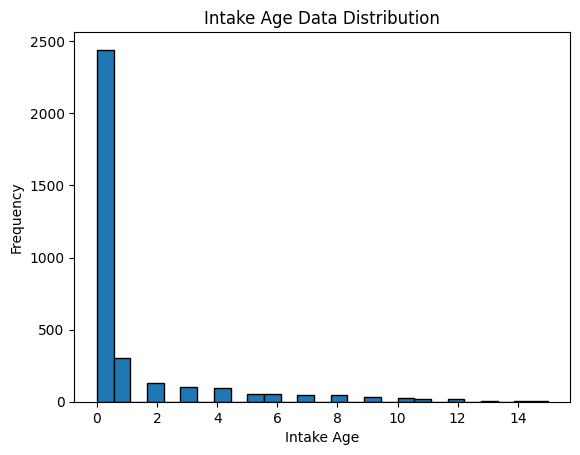

In [17]:
# ploting bar plot for age column
selected_df['intake_age'].plot(bins=27, kind='hist', edgecolor='black')

# category_counts = selected_df['Sex'].value_counts()
# category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Intake Age')
plt.ylabel('Frequency')
plt.title('Intake Age Data Distribution')

# # Display the plot
plt.show()

In [18]:
age_category_counts = selected_df['intake_age'].value_counts()
age_category_counts

0     2441
1      302
2      132
3       99
4       95
6       56
5       53
7       48
8       44
9       35
10      23
11      18
12      16
13       8
14       8
15       3
Name: intake_age, dtype: int64

**Here we see histogram has outliers on right end and we need to remove these outliers for the sake of accurate prediction**

## Data visualization after cleaning for 'age'

In [19]:
selected_df= selected_df[selected_df['intake_age']<=10]
age_category_counts2 = selected_df['intake_age'].value_counts()
age_category_counts2

0     2441
1      302
2      132
3       99
4       95
6       56
5       53
7       48
8       44
9       35
10      23
Name: intake_age, dtype: int64

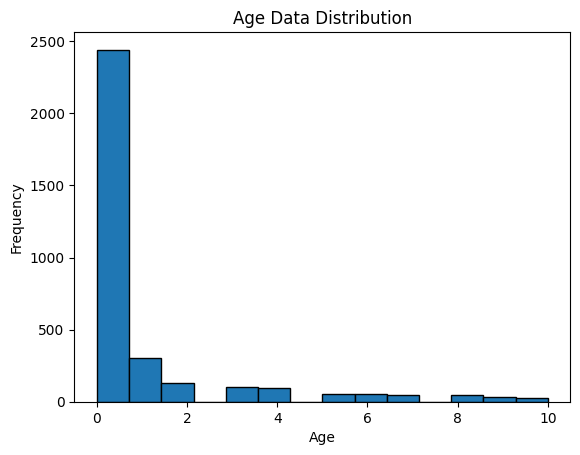

In [20]:
# ploting bar plot for age column
selected_df['intake_age'].plot(bins=14, kind='hist', edgecolor='black')

# category_counts = selected_df['Sex'].value_counts()
# category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Data Distribution')

# # Display the plot
plt.show()

## Analysing primary_color column & ploting bar plot

In [21]:
color_category_counts = selected_df['color'].value_counts()
# Display the counts
print(color_category_counts)

BRN TABBY          462
BLACK/WHITE        420
BLACK              397
BRN TABBY/WHITE    289
GRAY TABBY         169
                  ... 
WHITE/BLUE           1
WHITE/TORTIE         1
BLK TABBY/GRAY       1
BLACK/BLK SMOKE      1
BUFF/BROWN           1
Name: color, Length: 100, dtype: int64


In [22]:

# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Get the counts of unique values in the 'color' column
color_category_counts = selected_df['color'].value_counts()

# Convert the Series to a DataFrame for better display
color_category_counts_df = pd.DataFrame({'Color': color_category_counts.index, 'Count': color_category_counts.values})

# Display the DataFrame
print(color_category_counts_df)

# Reset display options to the default (if needed)
pd.reset_option('display.max_rows')


                    Color  Count
0               BRN TABBY    462
1             BLACK/WHITE    420
2                   BLACK    397
3         BRN TABBY/WHITE    289
4              GRAY TABBY    169
5              GRAY/WHITE    149
6                    GRAY    147
7               ORG TABBY    145
8                  TORTIE    127
9                 LYNX PT    100
10                 CALICO     74
11            WHITE/BLACK     72
12       GRAY TABBY/WHITE     72
13                SEAL PT     66
14        ORG TABBY/WHITE     52
15                   BUFF     43
16                 ORANGE     36
17             WHITE/GRAY     32
18        WHITE/BRN TABBY     32
19              BLK TABBY     32
20           ORANGE/WHITE     27
21      BLUE CREAM/TORTIE     25
22             BUFF/WHITE     24
23                  WHITE     24
24             BLUE CREAM     23
25       BRN TABBY/TORTIE     21
26               FLAME PT     21
27           CALICO/WHITE     17
28                BLUE PT     15
29        

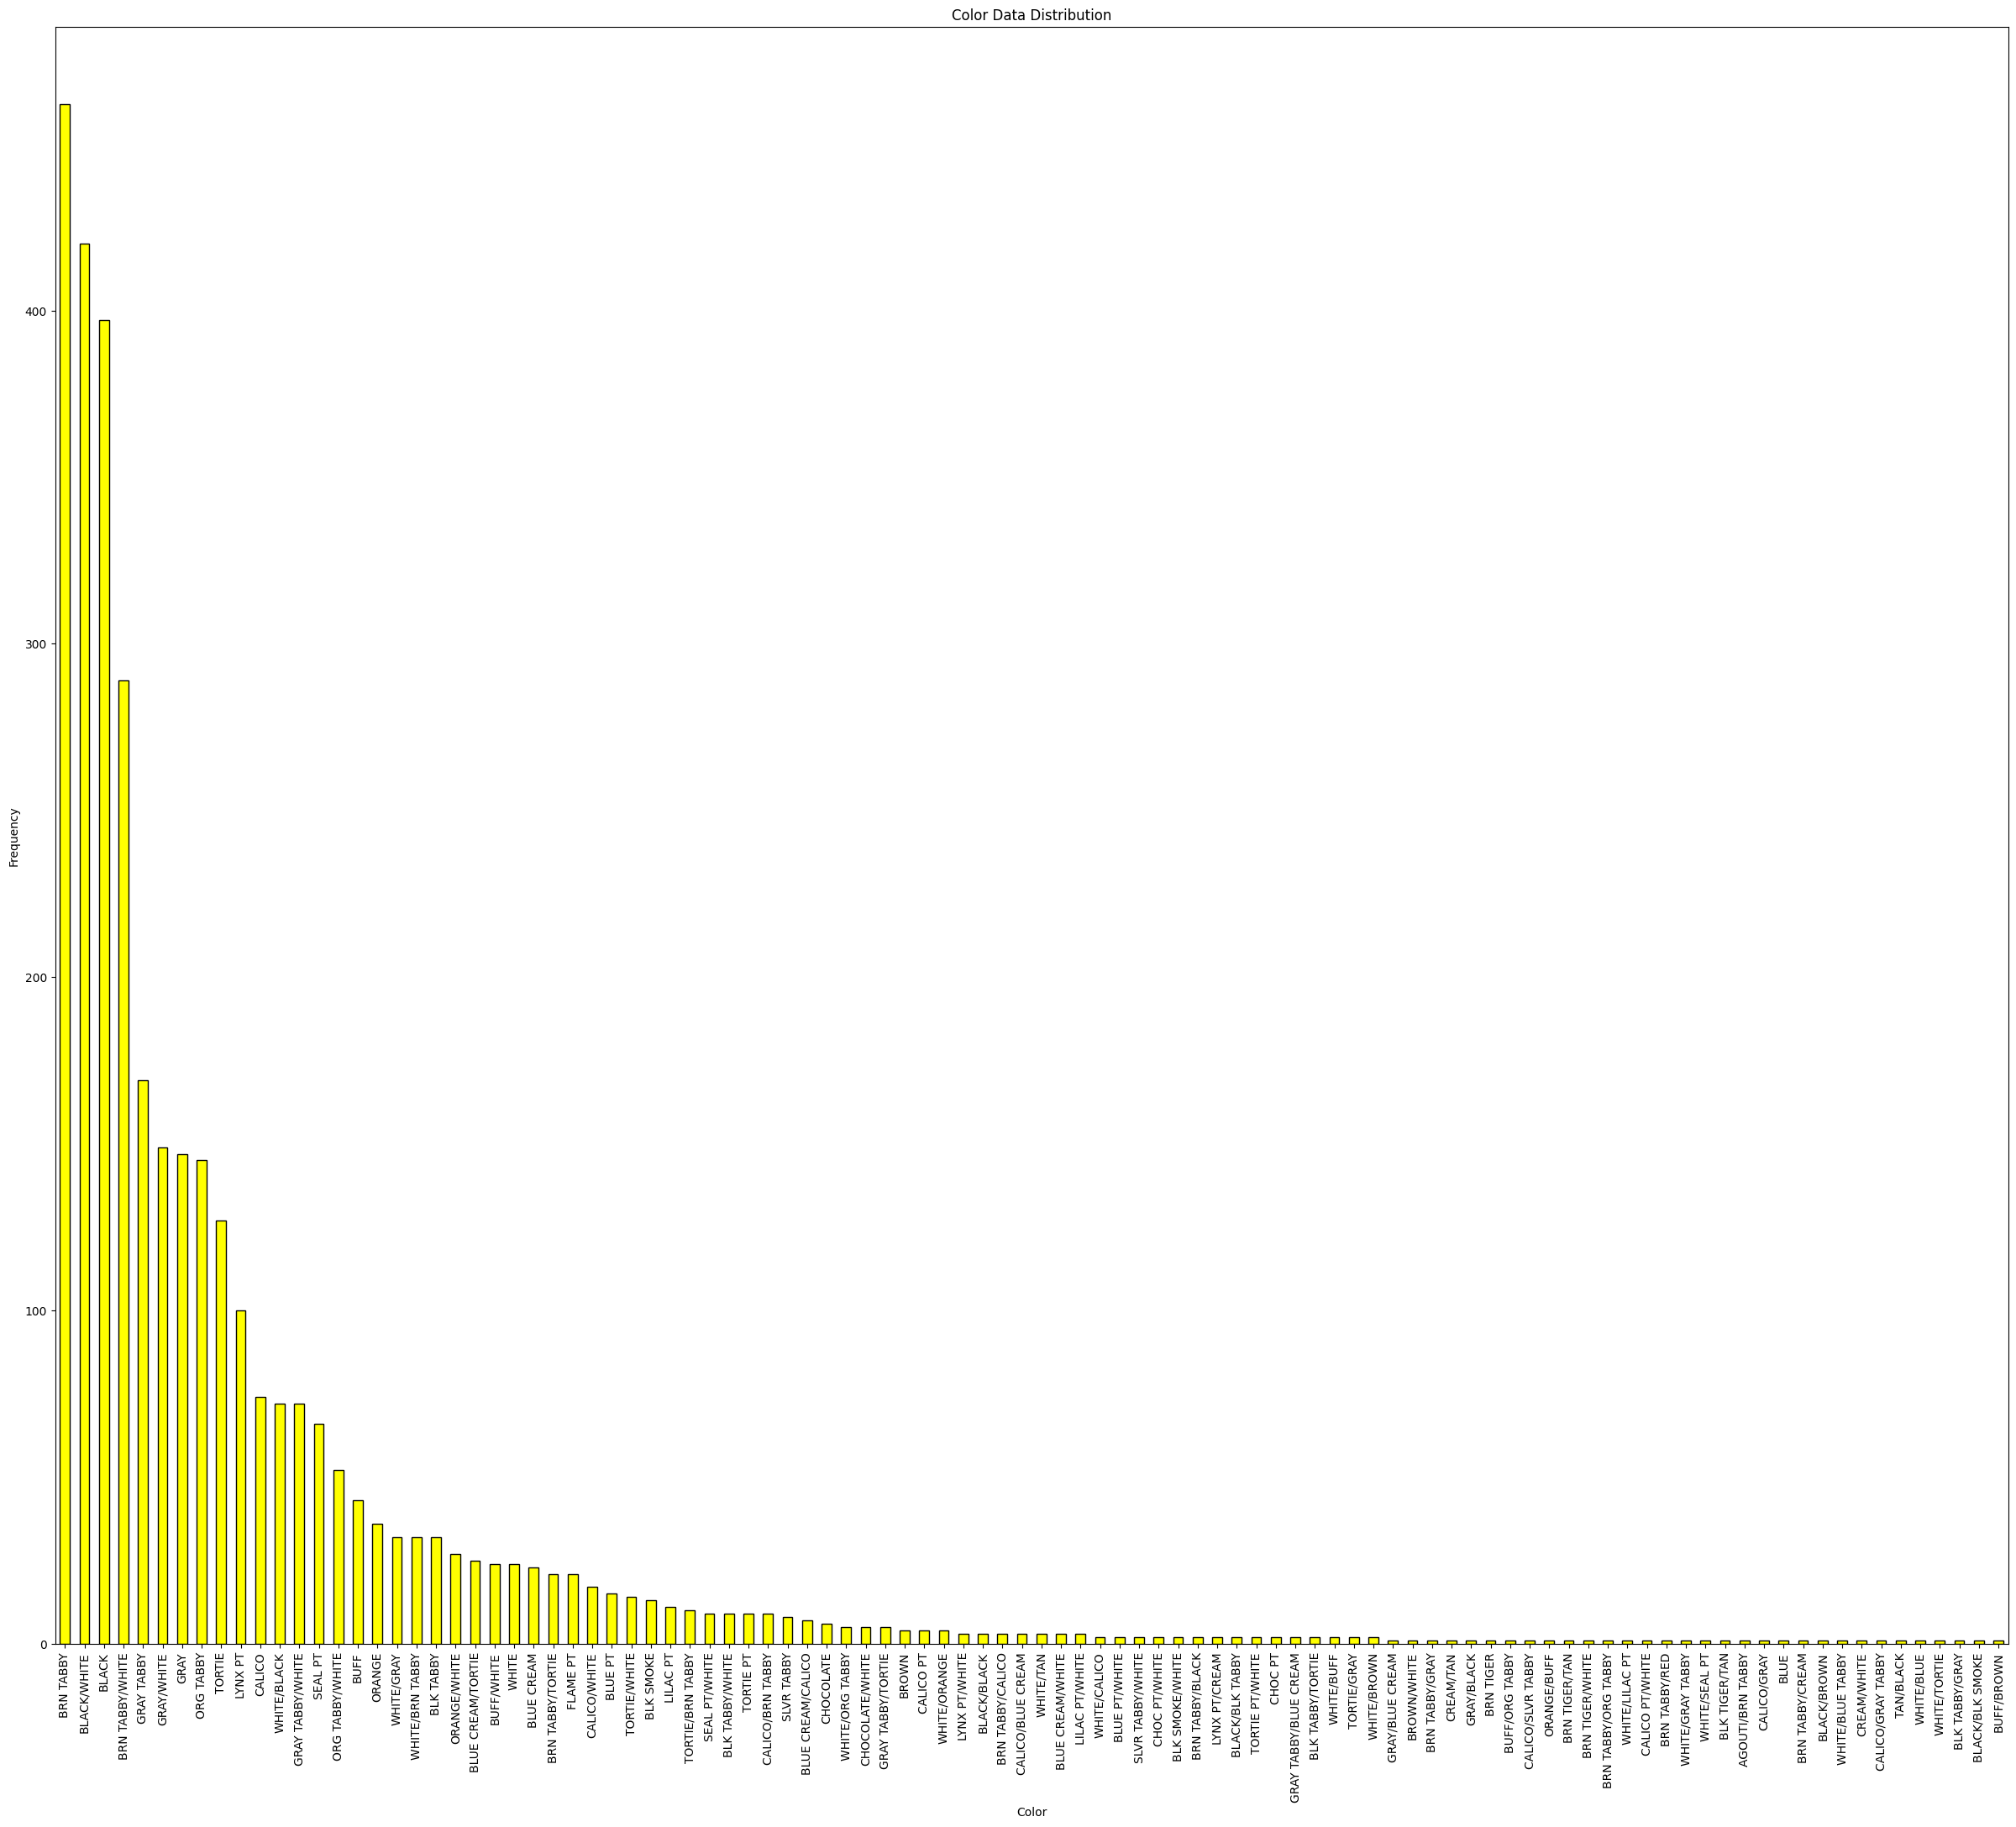

In [23]:
color_category_counts.plot(kind='bar', color='yellow', edgecolor='black', figsize= (30,25))

# Adding labels and title
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.title('Color Data Distribution')

# Display the plot
plt.show()

## Data cleaning for 'primary_color'

### Simplifing the color categories

**we can see here we have about 99 different colors and most of them has very low frequency, so we will reduce the number of category by assigning to common categories**

In [24]:
def assign_color(input_string):
    if 'TABBY' in input_string:
        return 'TABBY'
    elif '/' in input_string or ' ' in input_string:
        return 'MIX'
    else:
        return 'ONE COLOR'

selected_df['simplified_color'] = selected_df['color'].apply(assign_color)

selected_df.head()


,color,sex,size,breed,intake_age,intake_condition,intake_type,days_in_shelter,simplified_color
0,BRN TABBY/TORTIE,Spayed,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,81,TABBY
1,BRN TABBY/TORTIE,Spayed,KITTN,DOMESTIC SH,0,HEALTHY,OWNER SURRENDER,32,TABBY
2,BRN TABBY,Spayed,SMALL,DOMESTIC MH,0,HEALTHY,STRAY,94,TABBY
3,BRN TABBY,Neutered,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,80,TABBY
4,ORG TABBY/WHITE,Spayed,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,70,TABBY


## Data visualization after cleaning for 'color'

In [25]:
color_category_counts2 = selected_df['simplified_color'].value_counts()
color_category_counts2

TABBY        1344
MIX          1125
ONE COLOR     859
Name: simplified_color, dtype: int64

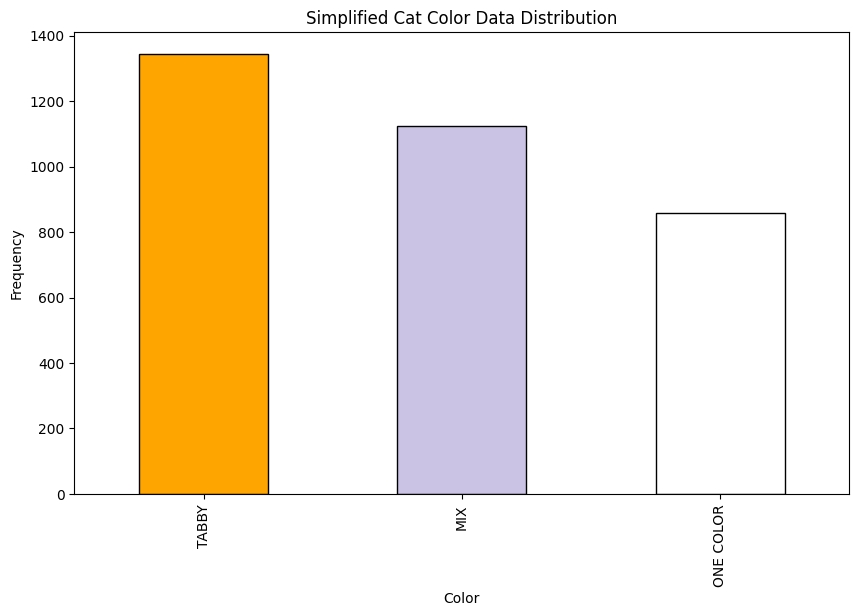

In [26]:
import matplotlib.pyplot as plt

# Assuming category_counts2 is your Series
# color_category_counts2 = pd.Series({'TABBY': 949, 'BLACK': 744, 'OTHER': 626, 'GRAY': 333, 'WHITE': 219})

# Create a color dictionary for each category
color_dict = {'TABBY': 'orange', 'MIX': '#CBC3E3', 'ONE COLOR': 'white'}

# Plot the bar chart with specified colors
color_category_counts2.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=[color_dict.get(x, 'blue') for x in color_category_counts2.index])

# Adding labels and title
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.title('Simplified Cat Color Data Distribution')

# Display the plot
plt.show()


## Analysing 'sex' column & ploting bar plot

In [27]:
sex_category_counts = selected_df['sex'].value_counts()
sex_category_counts

Neutered    1667
Spayed      1651
Male           5
Female         5
Name: sex, dtype: int64

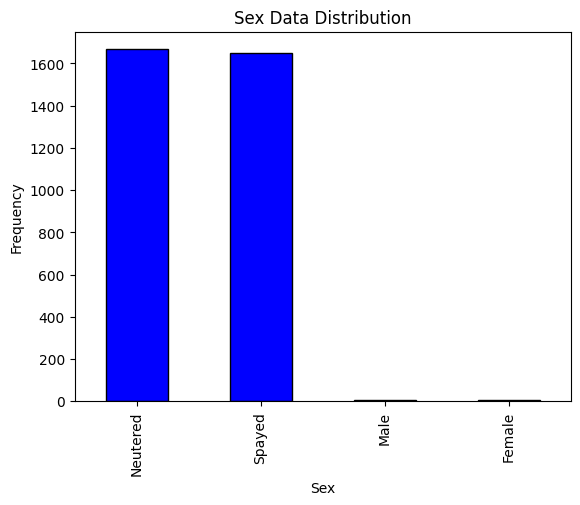

In [28]:
# ploting bar plot for sex column

category_counts = selected_df['sex'].value_counts()
category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Sex Data Distribution')

# Display the plot
plt.show()

### Removing male female type

In [29]:
selected_df= selected_df[selected_df['sex'] != ('Male' or 'Female')]
selected_df.head()

,color,sex,size,breed,intake_age,intake_condition,intake_type,days_in_shelter,simplified_color
0,BRN TABBY/TORTIE,Spayed,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,81,TABBY
1,BRN TABBY/TORTIE,Spayed,KITTN,DOMESTIC SH,0,HEALTHY,OWNER SURRENDER,32,TABBY
2,BRN TABBY,Spayed,SMALL,DOMESTIC MH,0,HEALTHY,STRAY,94,TABBY
3,BRN TABBY,Neutered,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,80,TABBY
4,ORG TABBY/WHITE,Spayed,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,70,TABBY


In [30]:
def assign_sex(input_string):
    if 'Neutered'in input_string:
        return 'MALE'
    elif 'Spayed'in input_string:
        return 'FEMALE'

selected_df['simplified_sex'] = selected_df['sex'].apply(assign_sex)

selected_df.head()

,color,sex,size,breed,intake_age,intake_condition,intake_type,days_in_shelter,simplified_color,simplified_sex
0,BRN TABBY/TORTIE,Spayed,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,81,TABBY,FEMALE
1,BRN TABBY/TORTIE,Spayed,KITTN,DOMESTIC SH,0,HEALTHY,OWNER SURRENDER,32,TABBY,FEMALE
2,BRN TABBY,Spayed,SMALL,DOMESTIC MH,0,HEALTHY,STRAY,94,TABBY,FEMALE
3,BRN TABBY,Neutered,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,80,TABBY,MALE
4,ORG TABBY/WHITE,Spayed,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,70,TABBY,FEMALE


## Data visualization after cleaning for 'sex'

In [31]:
sex_category_counts = selected_df['simplified_sex'].value_counts()
sex_category_counts

MALE      1667
FEMALE    1651
Name: simplified_sex, dtype: int64

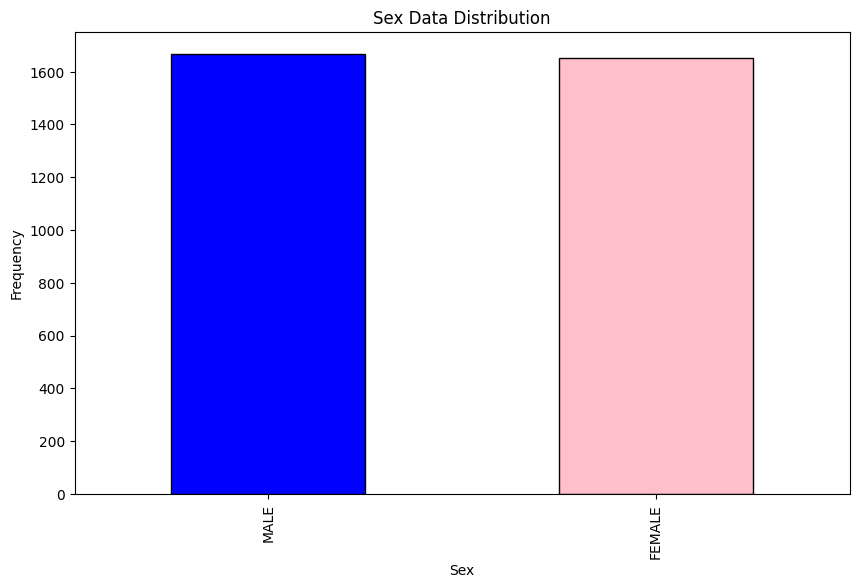

In [32]:
# ploting bar plot for simplified sex column

color_dict = {'MALE': 'blue', 'FEMALE': 'pink'}

# Plot the bar chart with specified colors
sex_category_counts.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=[color_dict.get(x, 'blue') for x in sex_category_counts.index])

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Sex Data Distribution')

# Display the plot
plt.show()

## Data visualization & cleaning for 'intake_condition'

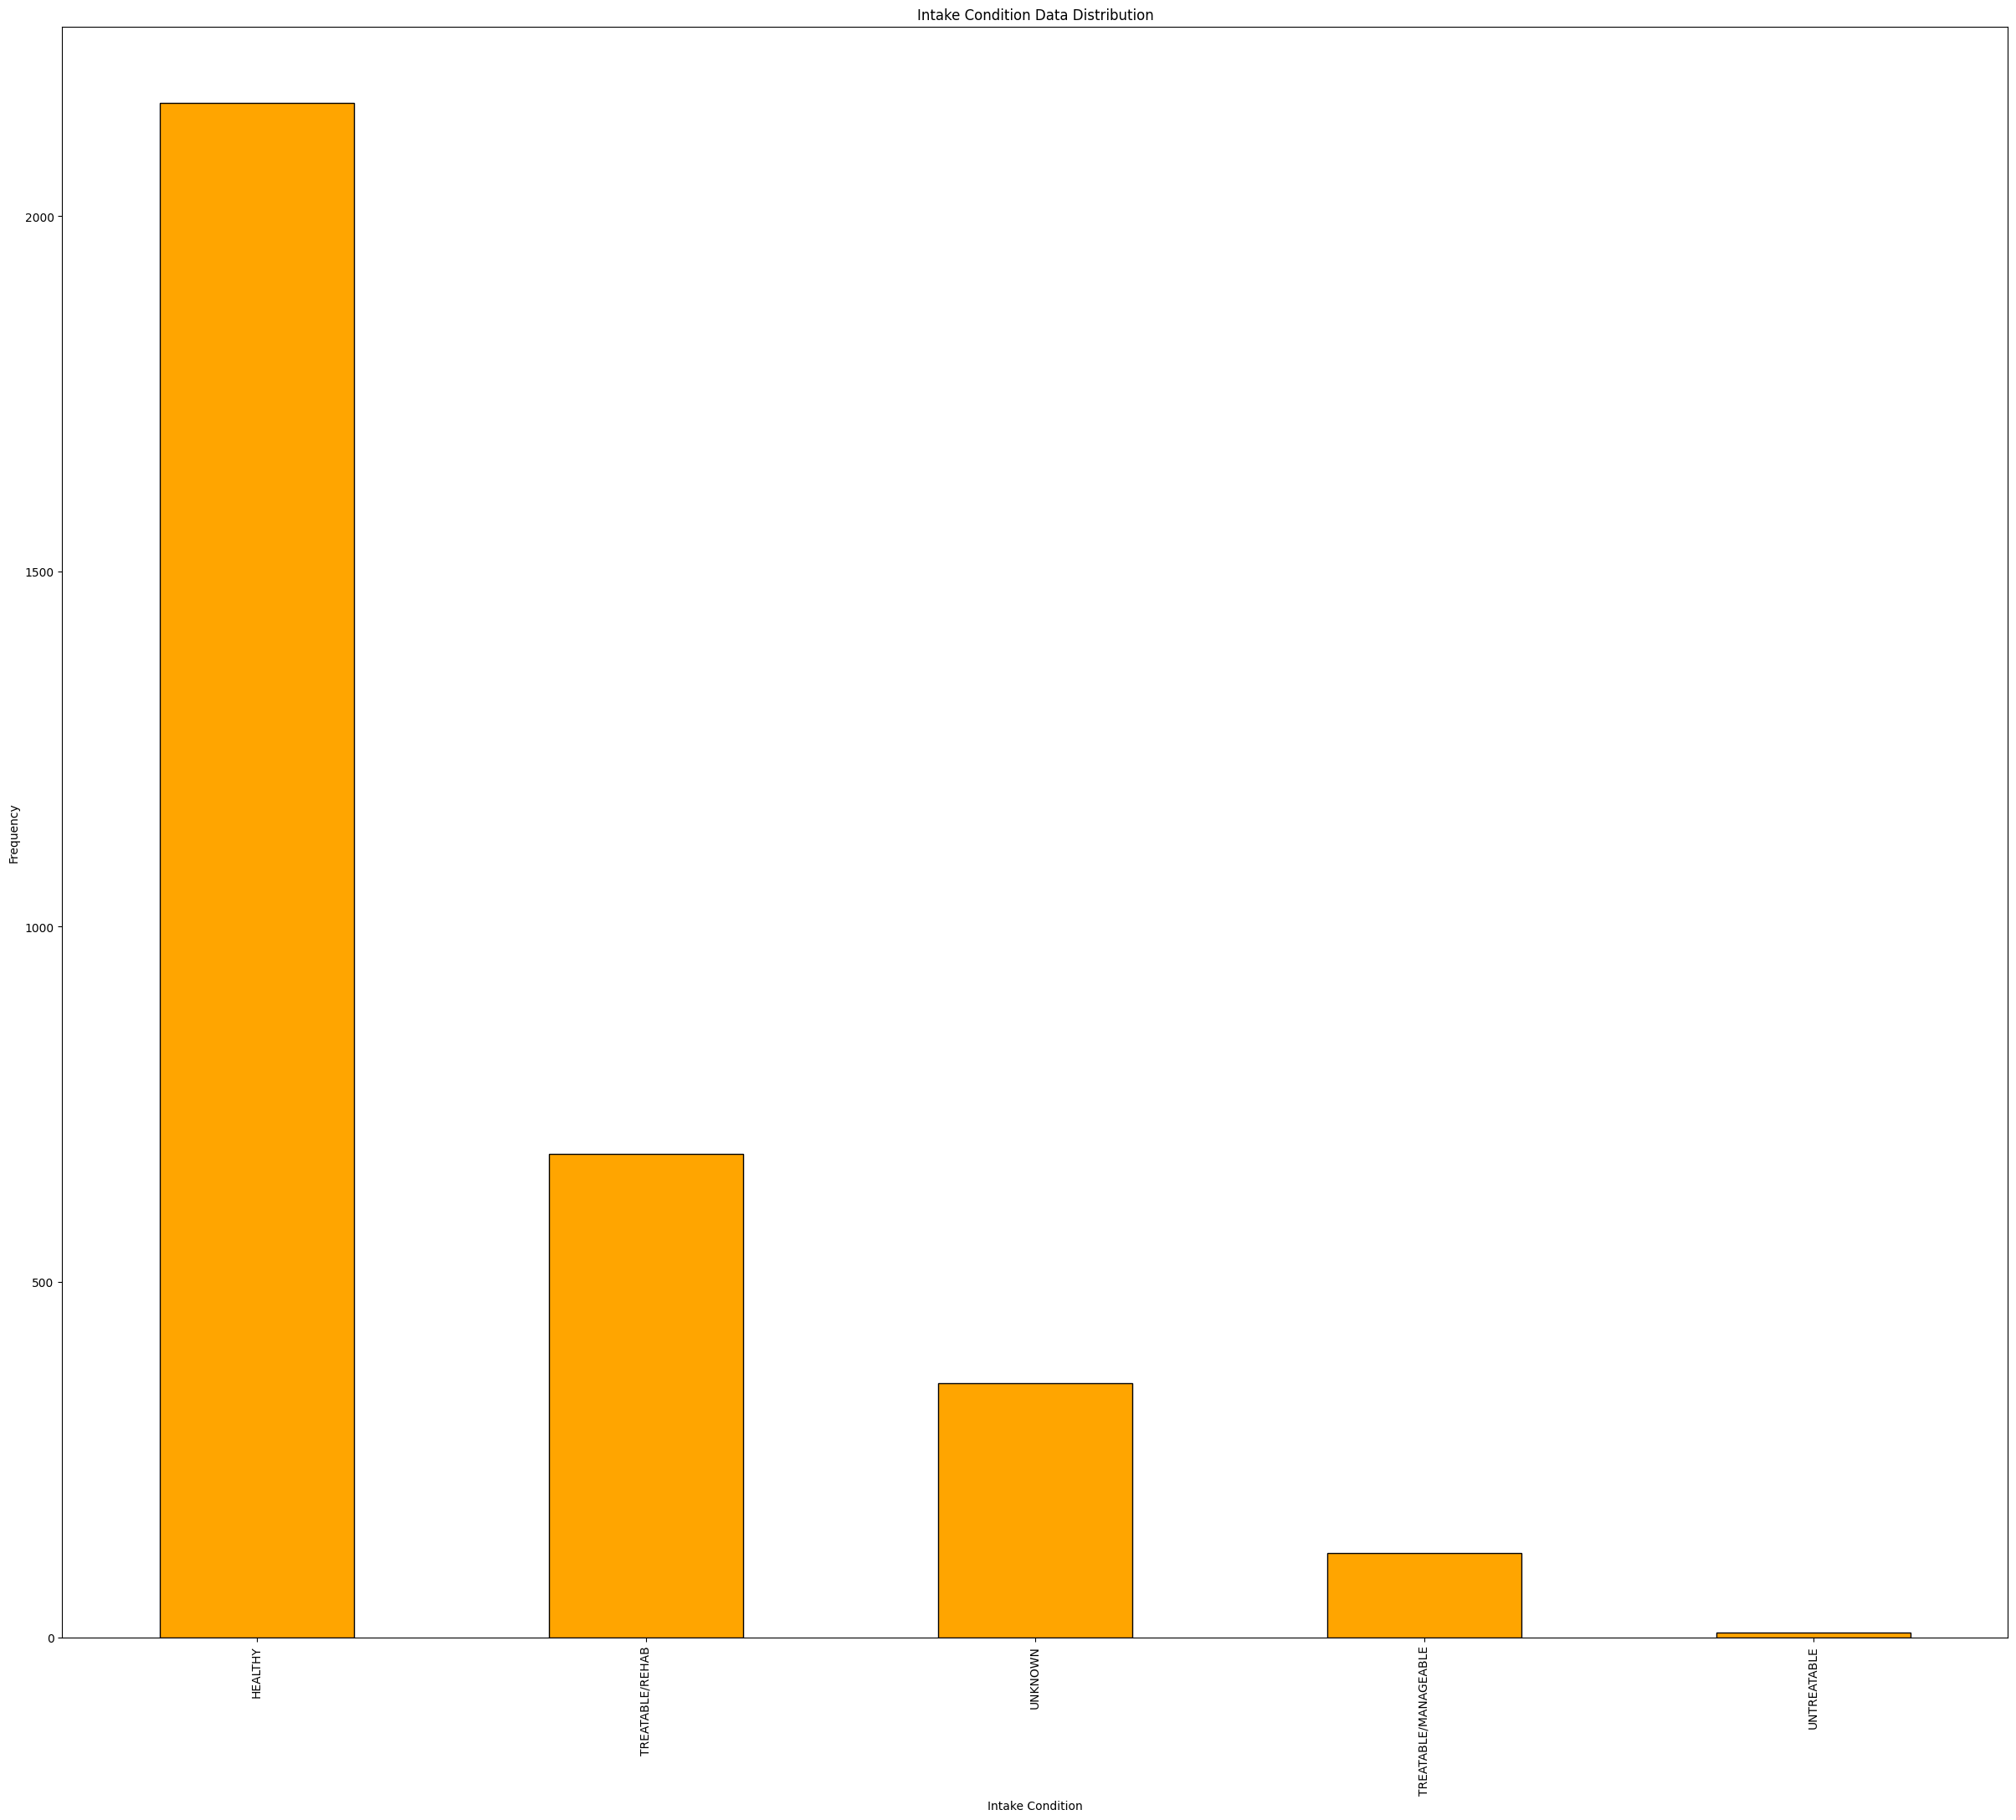

In [33]:
# ploting bar plot for Intake_Condition column
intake_condition_category_counts = selected_df['intake_condition'].value_counts()

intake_condition_category_counts.plot(kind='bar', color='orange', edgecolor='black', figsize= (30,25))

# Adding labels and title
plt.xlabel('Intake Condition')
plt.ylabel('Frequency')
plt.title('Intake Condition Data Distribution')

# Display the plot
plt.show()

In [34]:
intake_condition_category_counts

HEALTHY                 2159
TREATABLE/REHAB          680
UNKNOWN                  358
TREATABLE/MANAGEABLE     119
UNTREATABLE                7
Name: intake_condition, dtype: int64

In [35]:
def assign_condition(input_string):
#     conditions_to_check = ['NORMAL', 'ILL MILD', 'ILL SEVERE']
    
    if 'HEALTHY' in input_string:
        return input_string
    elif 'TREATABLE' in input_string:
        return 'ILL'
    else:
        return 'OTHER'

selected_df['simplified_condition'] = selected_df['intake_condition'].apply(assign_condition)
selected_df.head()

,color,sex,size,breed,intake_age,intake_condition,intake_type,days_in_shelter,simplified_color,simplified_sex,simplified_condition
0,BRN TABBY/TORTIE,Spayed,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,81,TABBY,FEMALE,OTHER
1,BRN TABBY/TORTIE,Spayed,KITTN,DOMESTIC SH,0,HEALTHY,OWNER SURRENDER,32,TABBY,FEMALE,HEALTHY
2,BRN TABBY,Spayed,SMALL,DOMESTIC MH,0,HEALTHY,STRAY,94,TABBY,FEMALE,HEALTHY
3,BRN TABBY,Neutered,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,80,TABBY,MALE,OTHER
4,ORG TABBY/WHITE,Spayed,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,70,TABBY,FEMALE,OTHER


## Data visualization after cleaning for 'intake condition'

In [36]:
intake_condition_category_counts2 = selected_df['simplified_condition'].value_counts()
intake_condition_category_counts2

HEALTHY    2159
ILL         806
OTHER       358
Name: simplified_condition, dtype: int64

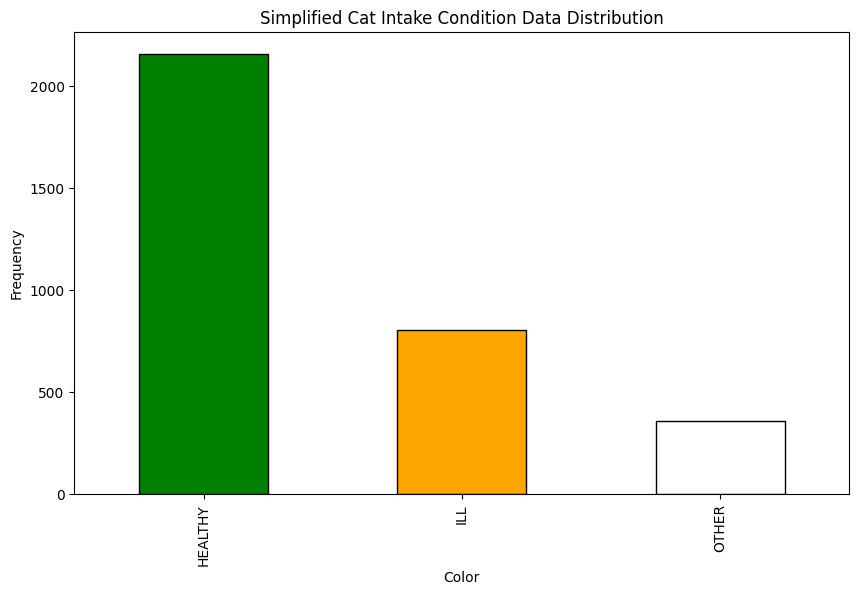

In [37]:
import matplotlib.pyplot as plt

# Create a color dictionary for each category
color_dict = {'HEALTHY': 'green','OTHER': 'white', 'INJURED': 'gray', 'ILL': 'orange'}

# Plot the bar chart with specified colors
intake_condition_category_counts2.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=[color_dict.get(x, 'blue') for x in intake_condition_category_counts2.index])

# Adding labels and title
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.title('Simplified Cat Intake Condition Data Distribution')

# Display the plot
plt.show()


## Data visualization and cleaning for 'intake type'

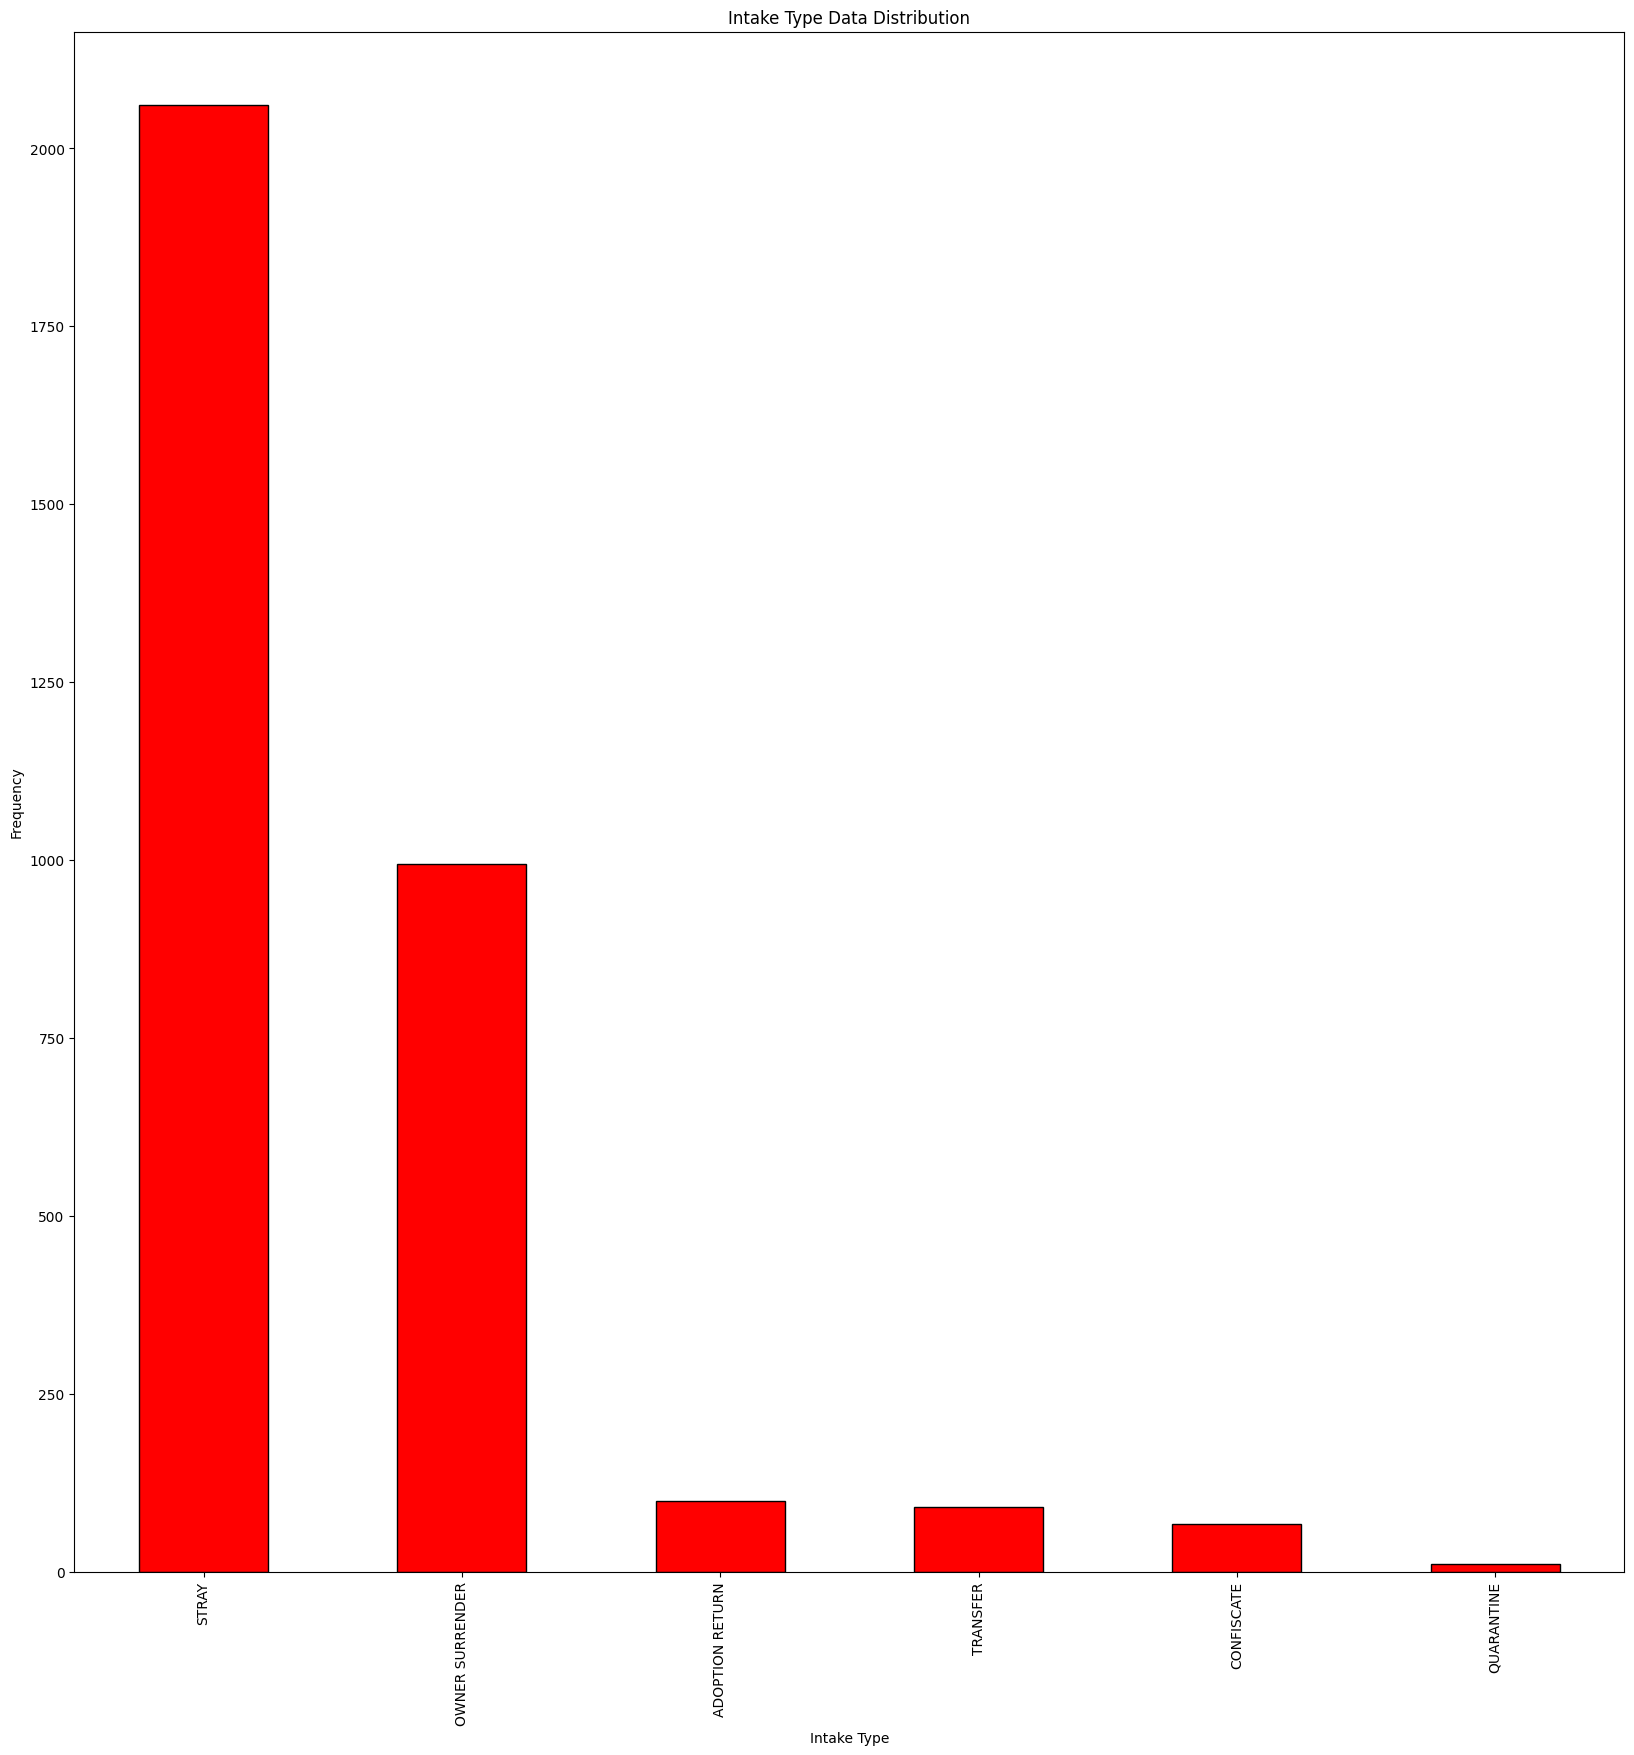

In [38]:
# ploting bar plot for Intake Type column

intake_type_category_counts = selected_df['intake_type'].value_counts()
intake_type_category_counts.plot(kind='bar', color='red', edgecolor='black', figsize= (20,20))

# Adding labels and title
plt.xlabel('Intake Type')
plt.ylabel('Frequency')
plt.title('Intake Type Data Distribution')

# Display the plot
plt.show()

**At this point I don't think Intake Type has any significance on prediction**

In [39]:
intake_type_category_counts

STRAY              2061
OWNER SURRENDER     995
ADOPTION RETURN      99
TRANSFER             91
CONFISCATE           67
QUARANTINE           10
Name: intake_type, dtype: int64

In [40]:
def assign_type(input_string):
    type_to_check = ['STRAY', 'OWNER SURRENDER']
    
    if any(condition in input_string for condition in type_to_check):
        return input_string
    else:
        return 'OTHER'

selected_df['simplified_type'] = selected_df['intake_type'].apply(assign_type)
selected_df.head()

,color,sex,size,breed,intake_age,intake_condition,intake_type,days_in_shelter,simplified_color,simplified_sex,simplified_condition,simplified_type
0,BRN TABBY/TORTIE,Spayed,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,81,TABBY,FEMALE,OTHER,STRAY
1,BRN TABBY/TORTIE,Spayed,KITTN,DOMESTIC SH,0,HEALTHY,OWNER SURRENDER,32,TABBY,FEMALE,HEALTHY,OWNER SURRENDER
2,BRN TABBY,Spayed,SMALL,DOMESTIC MH,0,HEALTHY,STRAY,94,TABBY,FEMALE,HEALTHY,STRAY
3,BRN TABBY,Neutered,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,80,TABBY,MALE,OTHER,STRAY
4,ORG TABBY/WHITE,Spayed,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,70,TABBY,FEMALE,OTHER,STRAY


## Data visualization after cleaning for 'intake type'

In [41]:
intake_type_category_counts2 = selected_df['simplified_type'].value_counts()
intake_type_category_counts2

STRAY              2061
OWNER SURRENDER     995
OTHER               267
Name: simplified_type, dtype: int64

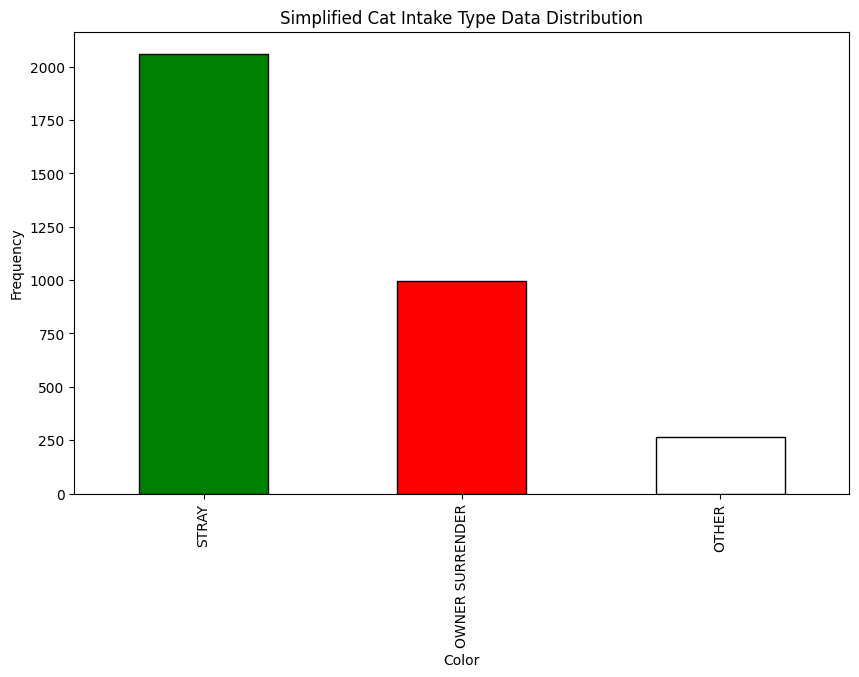

In [42]:
import matplotlib.pyplot as plt

# Create a color dictionary for each category
color_dict = {'STRAY': 'green', 'OTHER': 'white', 'OWNER SURRENDER': 'red'}

# Plot the bar chart with specified colors
intake_type_category_counts2.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=[color_dict.get(x, 'blue') for x in intake_type_category_counts2.index])

# Adding labels and title
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.title('Simplified Cat Intake Type Data Distribution')

# Display the plot
plt.show()


## Data visualization and cleaning for 'days stayed'

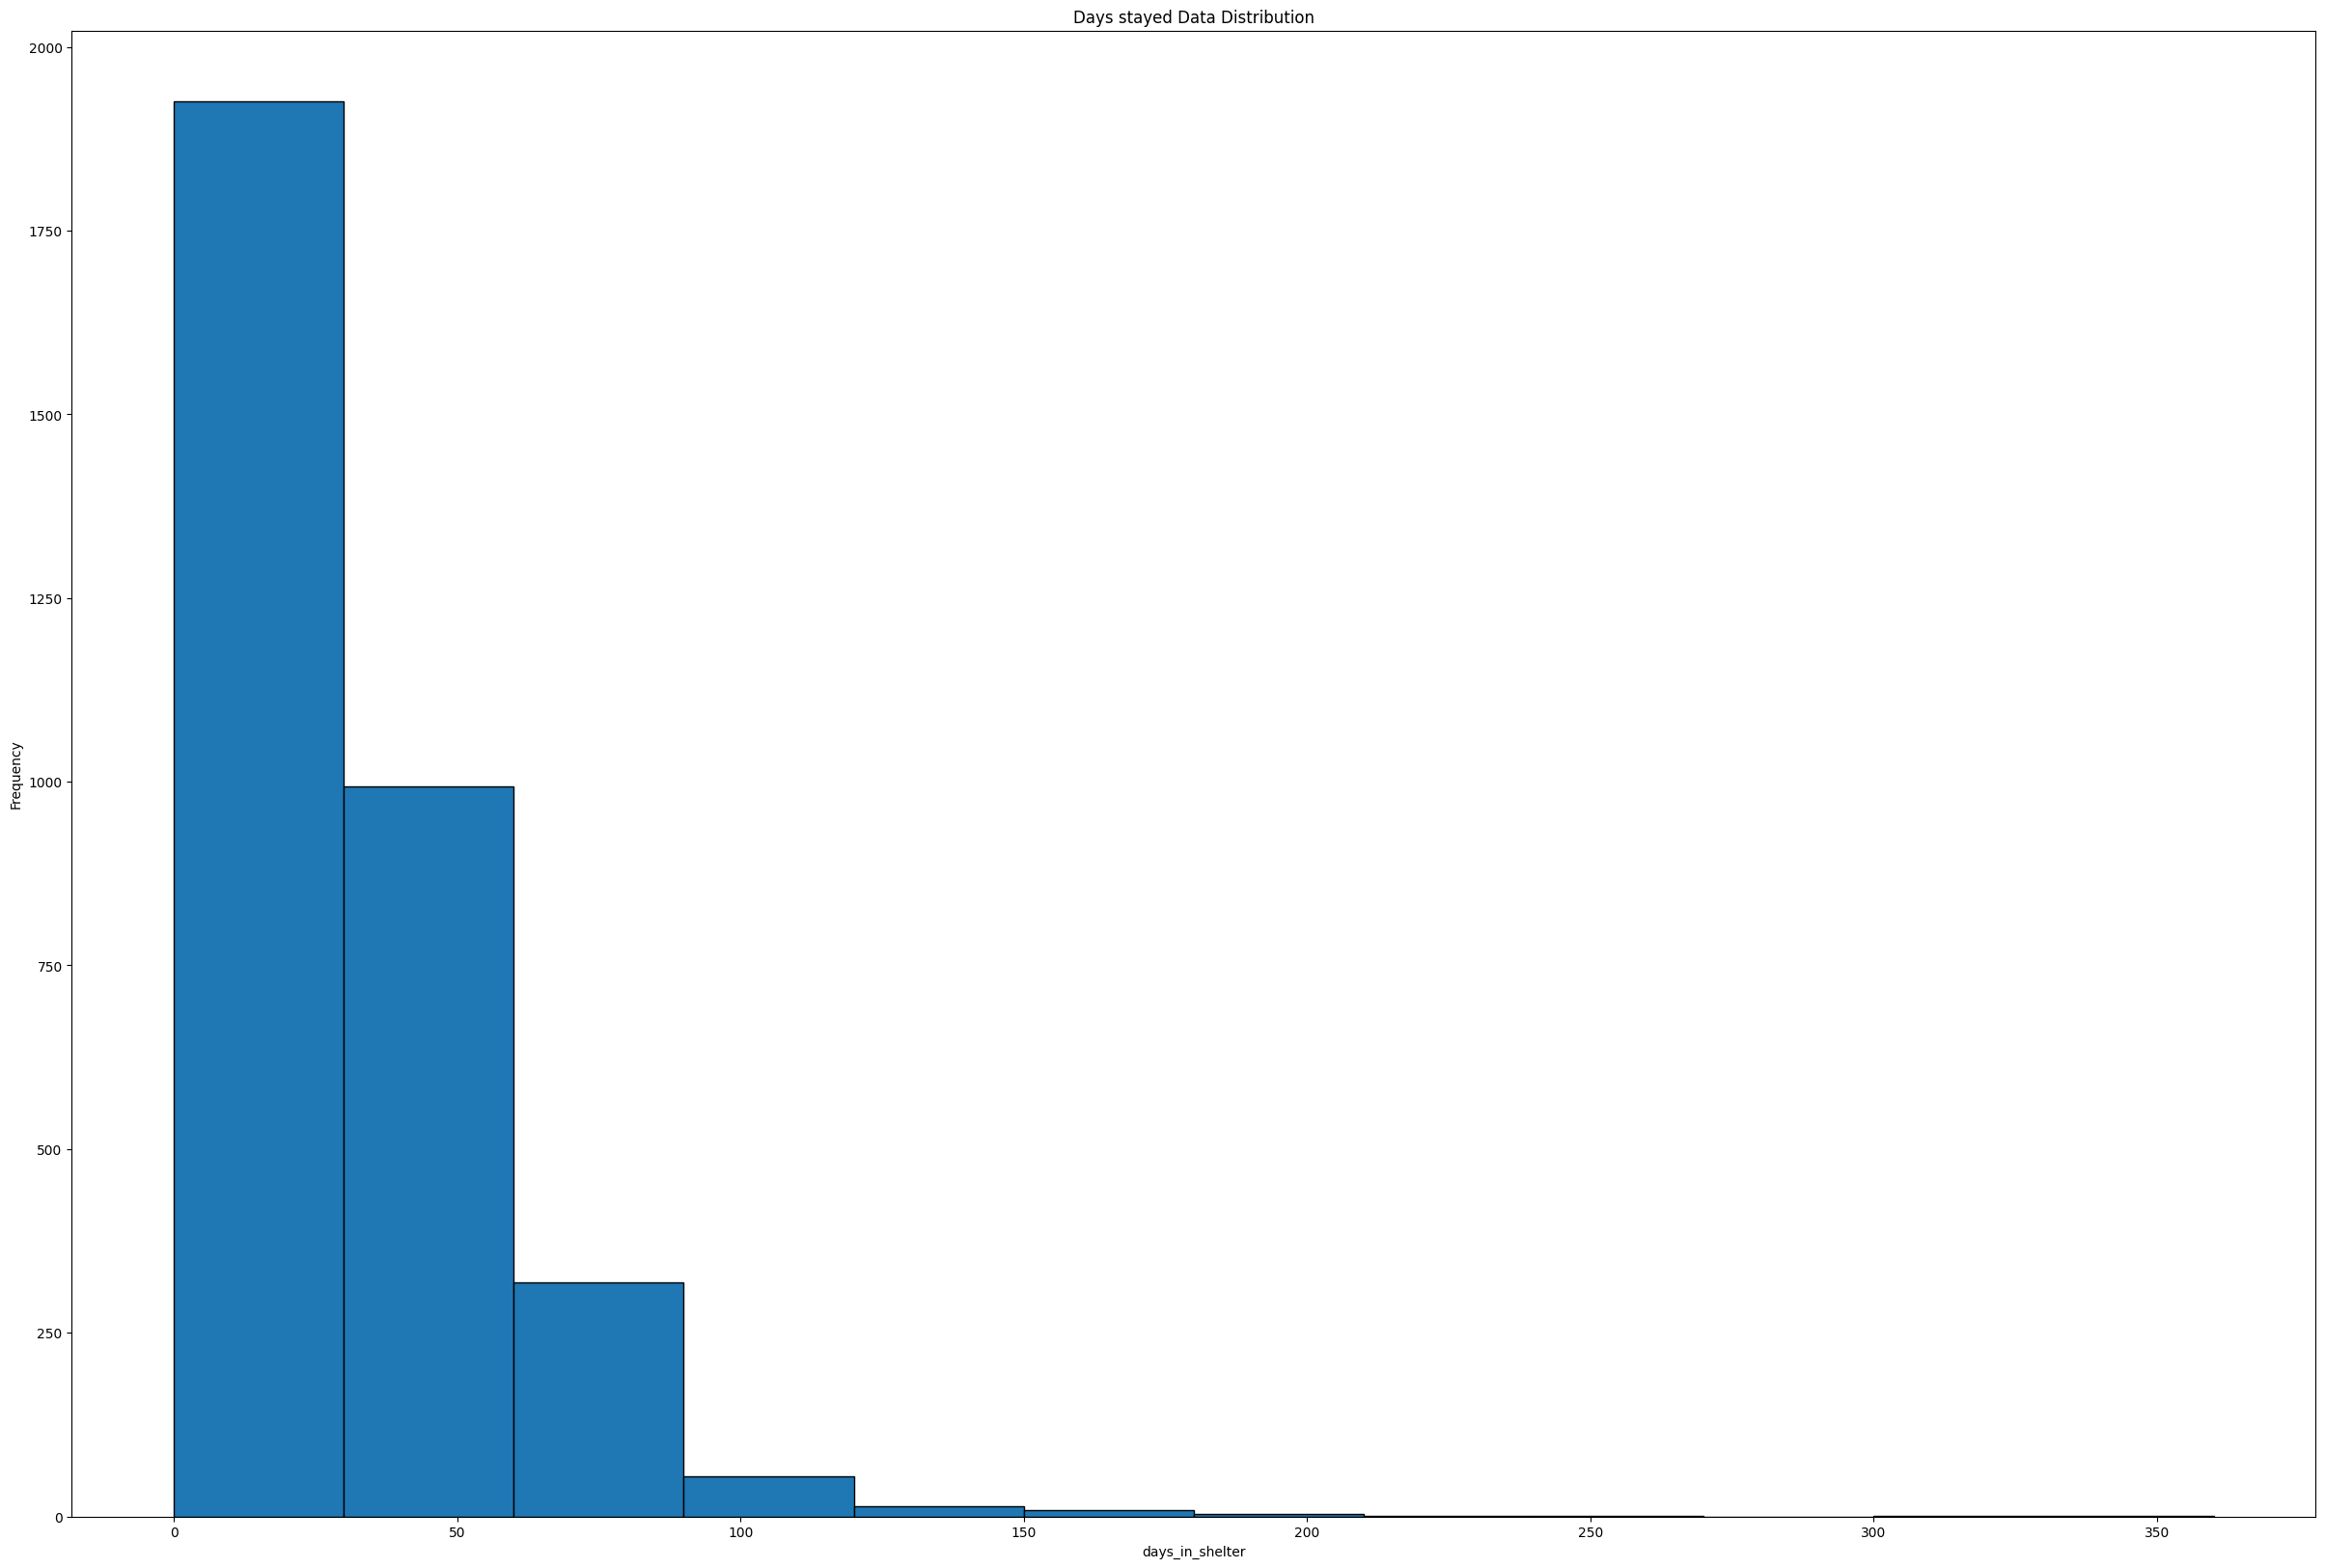

In [43]:
# ploting bar plot for days stayed column
# Calculate bin edges programmatically
bin_width = 30  # Adjust this based on your preference
min_value = int(np.floor(min(selected_df['days_in_shelter']) / bin_width) * bin_width)
max_value = int(np.ceil(max(selected_df['days_in_shelter']) / bin_width) * bin_width)
bins = range(min_value, max_value + bin_width, bin_width)

selected_df['days_in_shelter'].plot(bins= bins, kind='hist', edgecolor='black', figsize= (30,20))

# category_counts = selected_df['Sex'].value_counts()
# category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('days_in_shelter')
plt.ylabel('Frequency')
plt.title('Days stayed Data Distribution')

# # Display the plot
plt.show()

**Here we see a good amount of the cat leaves shelter with in a month and most of them leaves by 4 months. But for some exceptional cases cat stays upto several months, and we have to remove outliers for these cases**

## Data visualization after cleaning for 'days stayed'

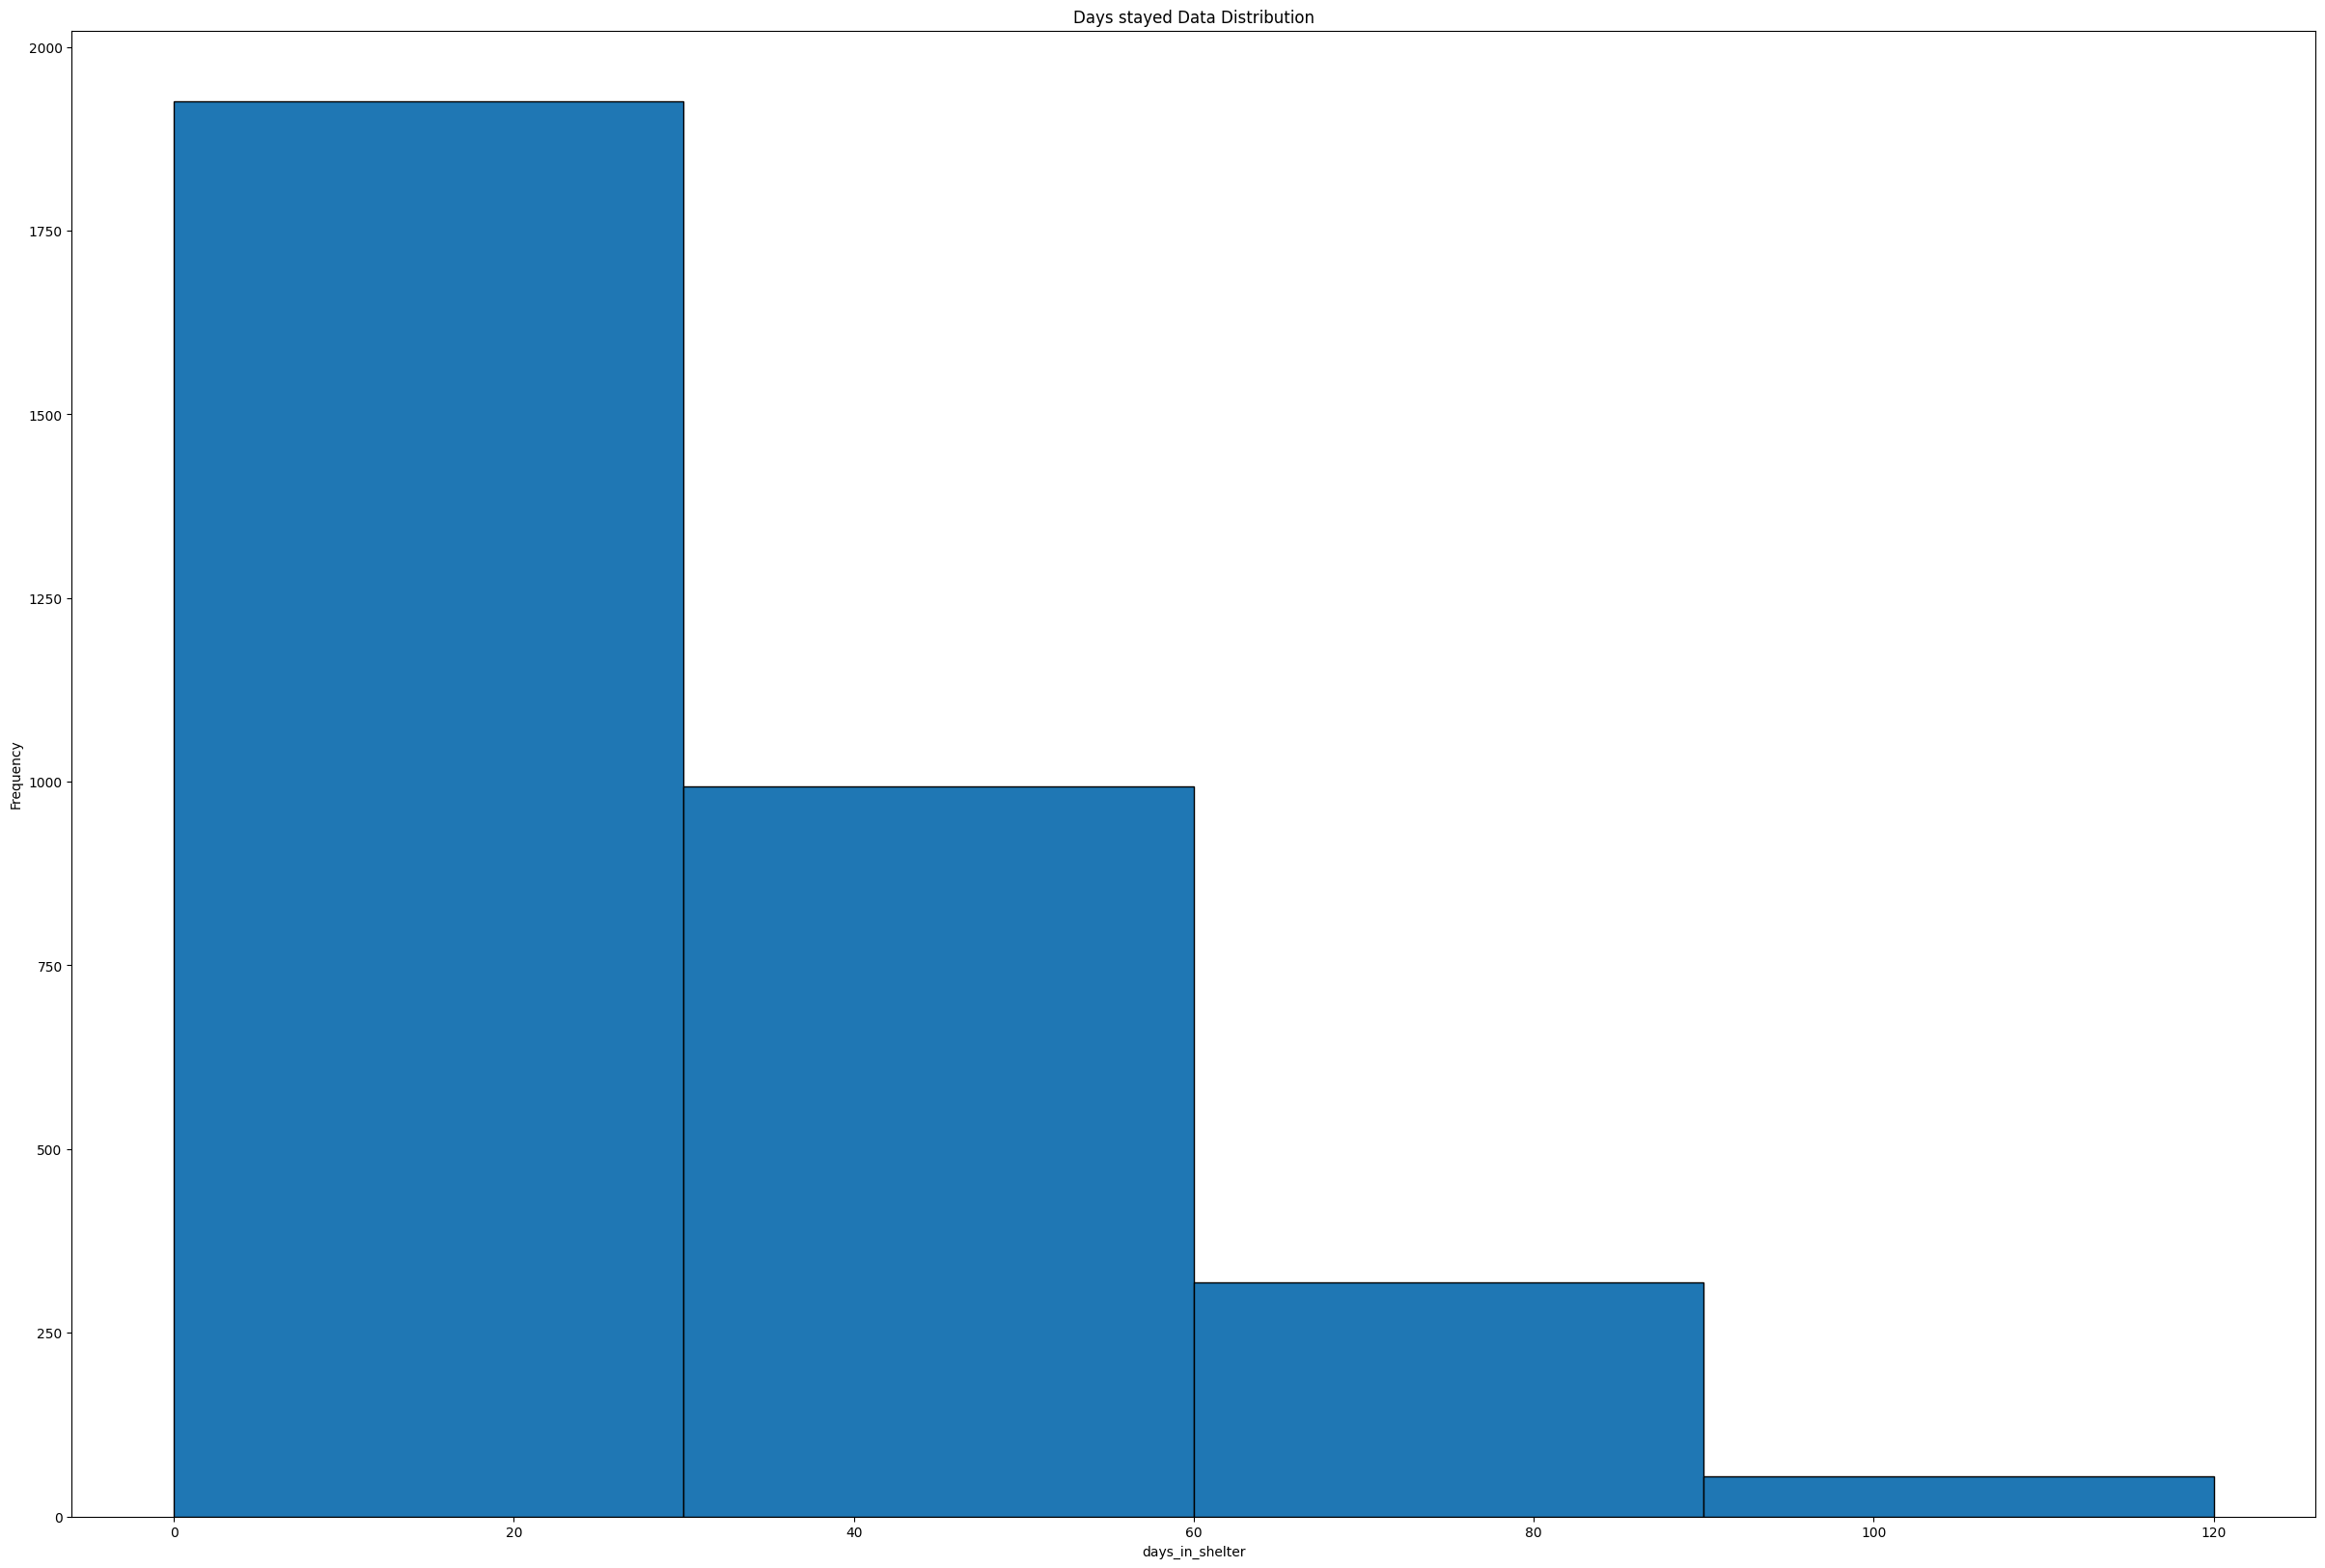

In [44]:
selected_df = selected_df[selected_df['days_in_shelter']<120]

bin_width = 30  # Adjust this based on your preference
min_value = int(np.floor(min(selected_df['days_in_shelter']) / bin_width) * bin_width)
max_value = int(np.ceil(max(selected_df['days_in_shelter']) / bin_width) * bin_width)
bins = range(min_value, max_value + bin_width, bin_width)

selected_df['days_in_shelter'].plot(bins= bins, kind='hist', edgecolor='black', figsize= (30,20))

# category_counts = selected_df['Sex'].value_counts()
# category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('days_in_shelter')
plt.ylabel('Frequency')
plt.title('Days stayed Data Distribution')

# # Display the plot
plt.show()

In [45]:
selected_df.head()

,color,sex,size,breed,intake_age,intake_condition,intake_type,days_in_shelter,simplified_color,simplified_sex,simplified_condition,simplified_type
0,BRN TABBY/TORTIE,Spayed,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,81,TABBY,FEMALE,OTHER,STRAY
1,BRN TABBY/TORTIE,Spayed,KITTN,DOMESTIC SH,0,HEALTHY,OWNER SURRENDER,32,TABBY,FEMALE,HEALTHY,OWNER SURRENDER
2,BRN TABBY,Spayed,SMALL,DOMESTIC MH,0,HEALTHY,STRAY,94,TABBY,FEMALE,HEALTHY,STRAY
3,BRN TABBY,Neutered,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,80,TABBY,MALE,OTHER,STRAY
4,ORG TABBY/WHITE,Spayed,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,70,TABBY,FEMALE,OTHER,STRAY


## Data visualization & cleaning for 'size'

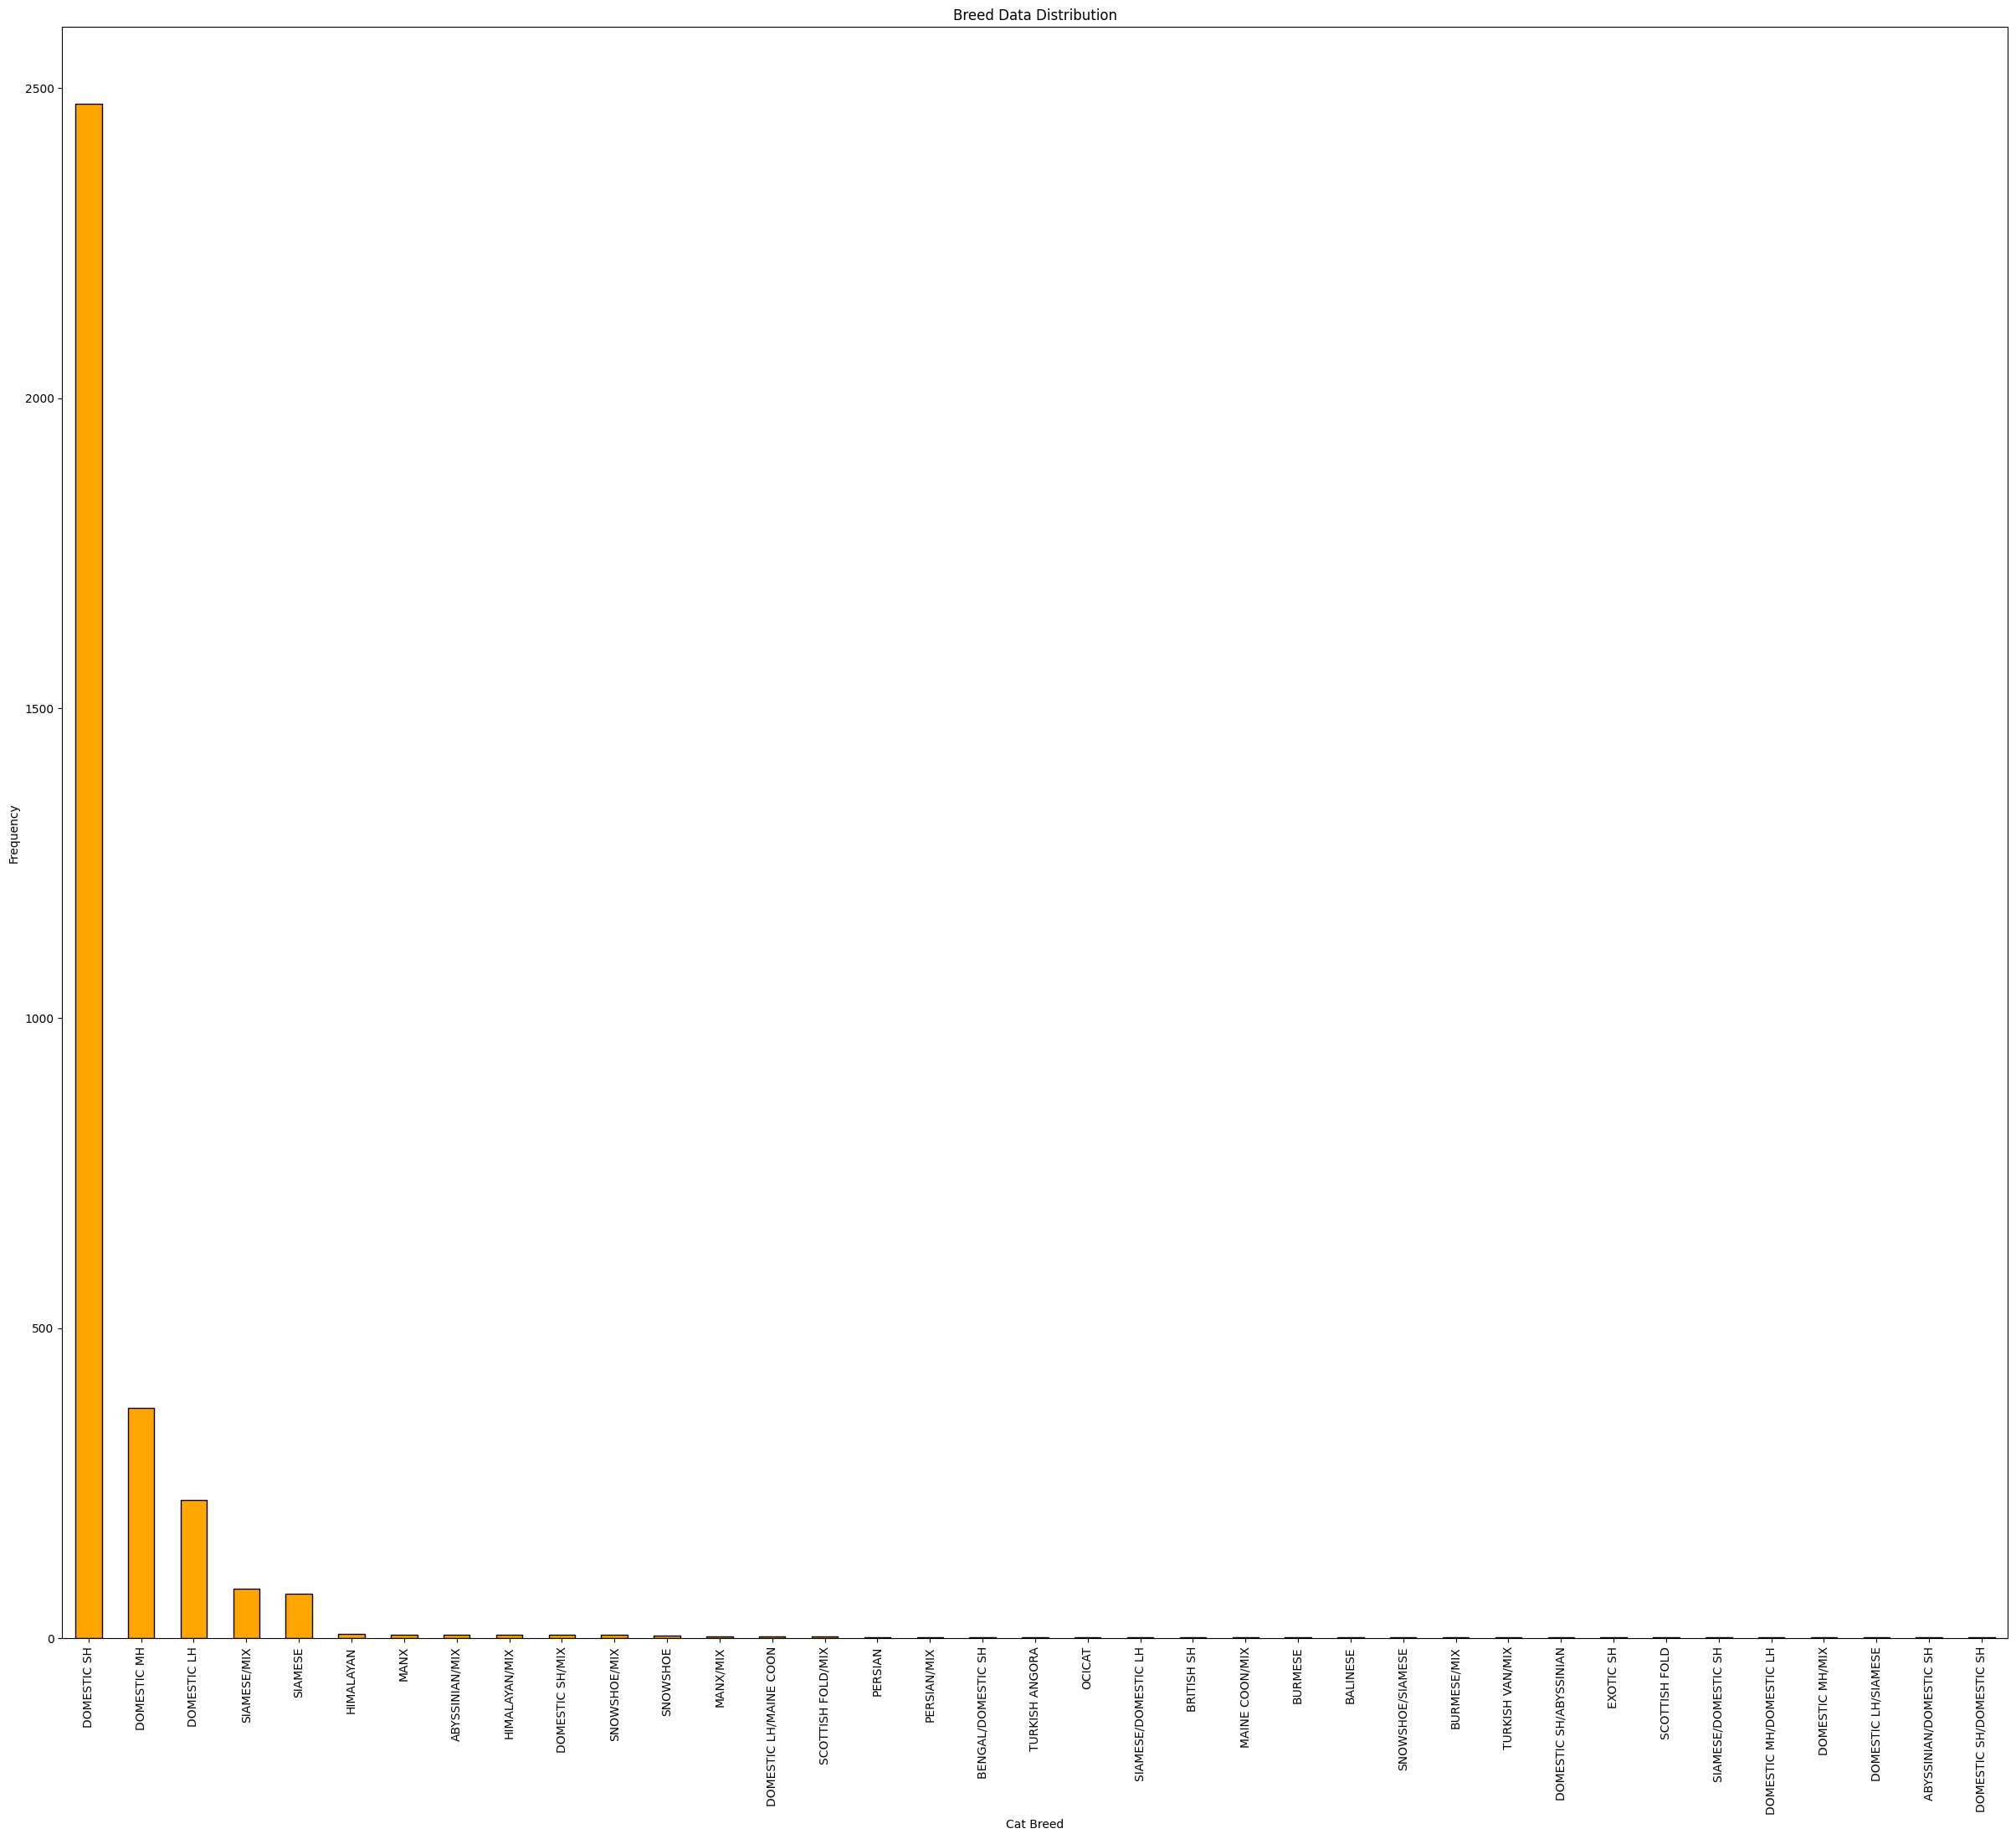

In [46]:
# ploting bar plot for Intake_Condition column
breed_category_counts = selected_df['breed'].value_counts()

breed_category_counts.plot(kind='bar', color='orange', edgecolor='black', figsize= (30,25))

# Adding labels and title
plt.xlabel('Cat Breed')
plt.ylabel('Frequency')
plt.title('Breed Data Distribution')

# Display the plot
plt.show()

In [47]:
breed_category_counts

DOMESTIC SH                2475
DOMESTIC MH                 372
DOMESTIC LH                 223
SIAMESE/MIX                  80
SIAMESE                      72
HIMALAYAN                     7
MANX                          6
ABYSSINIAN/MIX                5
HIMALAYAN/MIX                 5
DOMESTIC SH/MIX               5
SNOWSHOE/MIX                  5
SNOWSHOE                      4
MANX/MIX                      3
DOMESTIC LH/MAINE COON        3
SCOTTISH FOLD/MIX             3
PERSIAN                       2
PERSIAN/MIX                   2
BENGAL/DOMESTIC SH            2
TURKISH ANGORA                2
OCICAT                        1
SIAMESE/DOMESTIC LH           1
BRITISH SH                    1
MAINE COON/MIX                1
BURMESE                       1
BALINESE                      1
SNOWSHOE/SIAMESE              1
BURMESE/MIX                   1
TURKISH VAN/MIX               1
DOMESTIC SH/ABYSSINIAN        1
EXOTIC SH                     1
SCOTTISH FOLD                 1
SIAMESE/

In [48]:
def assign_breed(input_string):
#     conditions_to_check = ['NORMAL', 'ILL MILD', 'ILL SEVERE']
    
    if 'DOMESTIC' in input_string:
        return 'DOMESTIC BREED'
    else:
        return 'OTHER'

selected_df['simplified_breed'] = selected_df['breed'].apply(assign_breed)
selected_df.head()

,color,sex,size,breed,intake_age,intake_condition,intake_type,days_in_shelter,simplified_color,simplified_sex,simplified_condition,simplified_type,simplified_breed
0,BRN TABBY/TORTIE,Spayed,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,81,TABBY,FEMALE,OTHER,STRAY,DOMESTIC BREED
1,BRN TABBY/TORTIE,Spayed,KITTN,DOMESTIC SH,0,HEALTHY,OWNER SURRENDER,32,TABBY,FEMALE,HEALTHY,OWNER SURRENDER,DOMESTIC BREED
2,BRN TABBY,Spayed,SMALL,DOMESTIC MH,0,HEALTHY,STRAY,94,TABBY,FEMALE,HEALTHY,STRAY,DOMESTIC BREED
3,BRN TABBY,Neutered,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,80,TABBY,MALE,OTHER,STRAY,DOMESTIC BREED
4,ORG TABBY/WHITE,Spayed,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,70,TABBY,FEMALE,OTHER,STRAY,DOMESTIC BREED


## Data visualization after cleaning for 'breed'

In [49]:
breed_category_counts2 = selected_df['simplified_breed'].value_counts()
breed_category_counts2

DOMESTIC BREED    3088
OTHER              206
Name: simplified_breed, dtype: int64

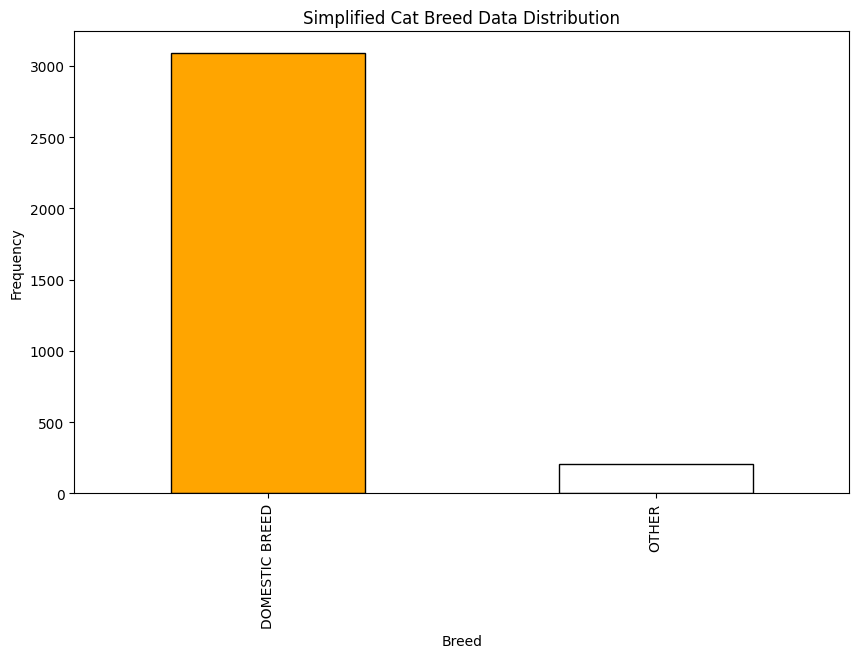

In [50]:
import matplotlib.pyplot as plt

# Create a color dictionary for each category
color_dict = {'DOMESTIC BREED': 'orange','OTHER': 'white'}

# Plot the bar chart with specified colors
breed_category_counts2.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=[color_dict.get(x, 'blue') for x in breed_category_counts2.index])

# Adding labels and title
plt.xlabel('Breed')
plt.ylabel('Frequency')
plt.title('Simplified Cat Breed Data Distribution')

# Display the plot
plt.show()


## Data visualization & cleaning for 'size'

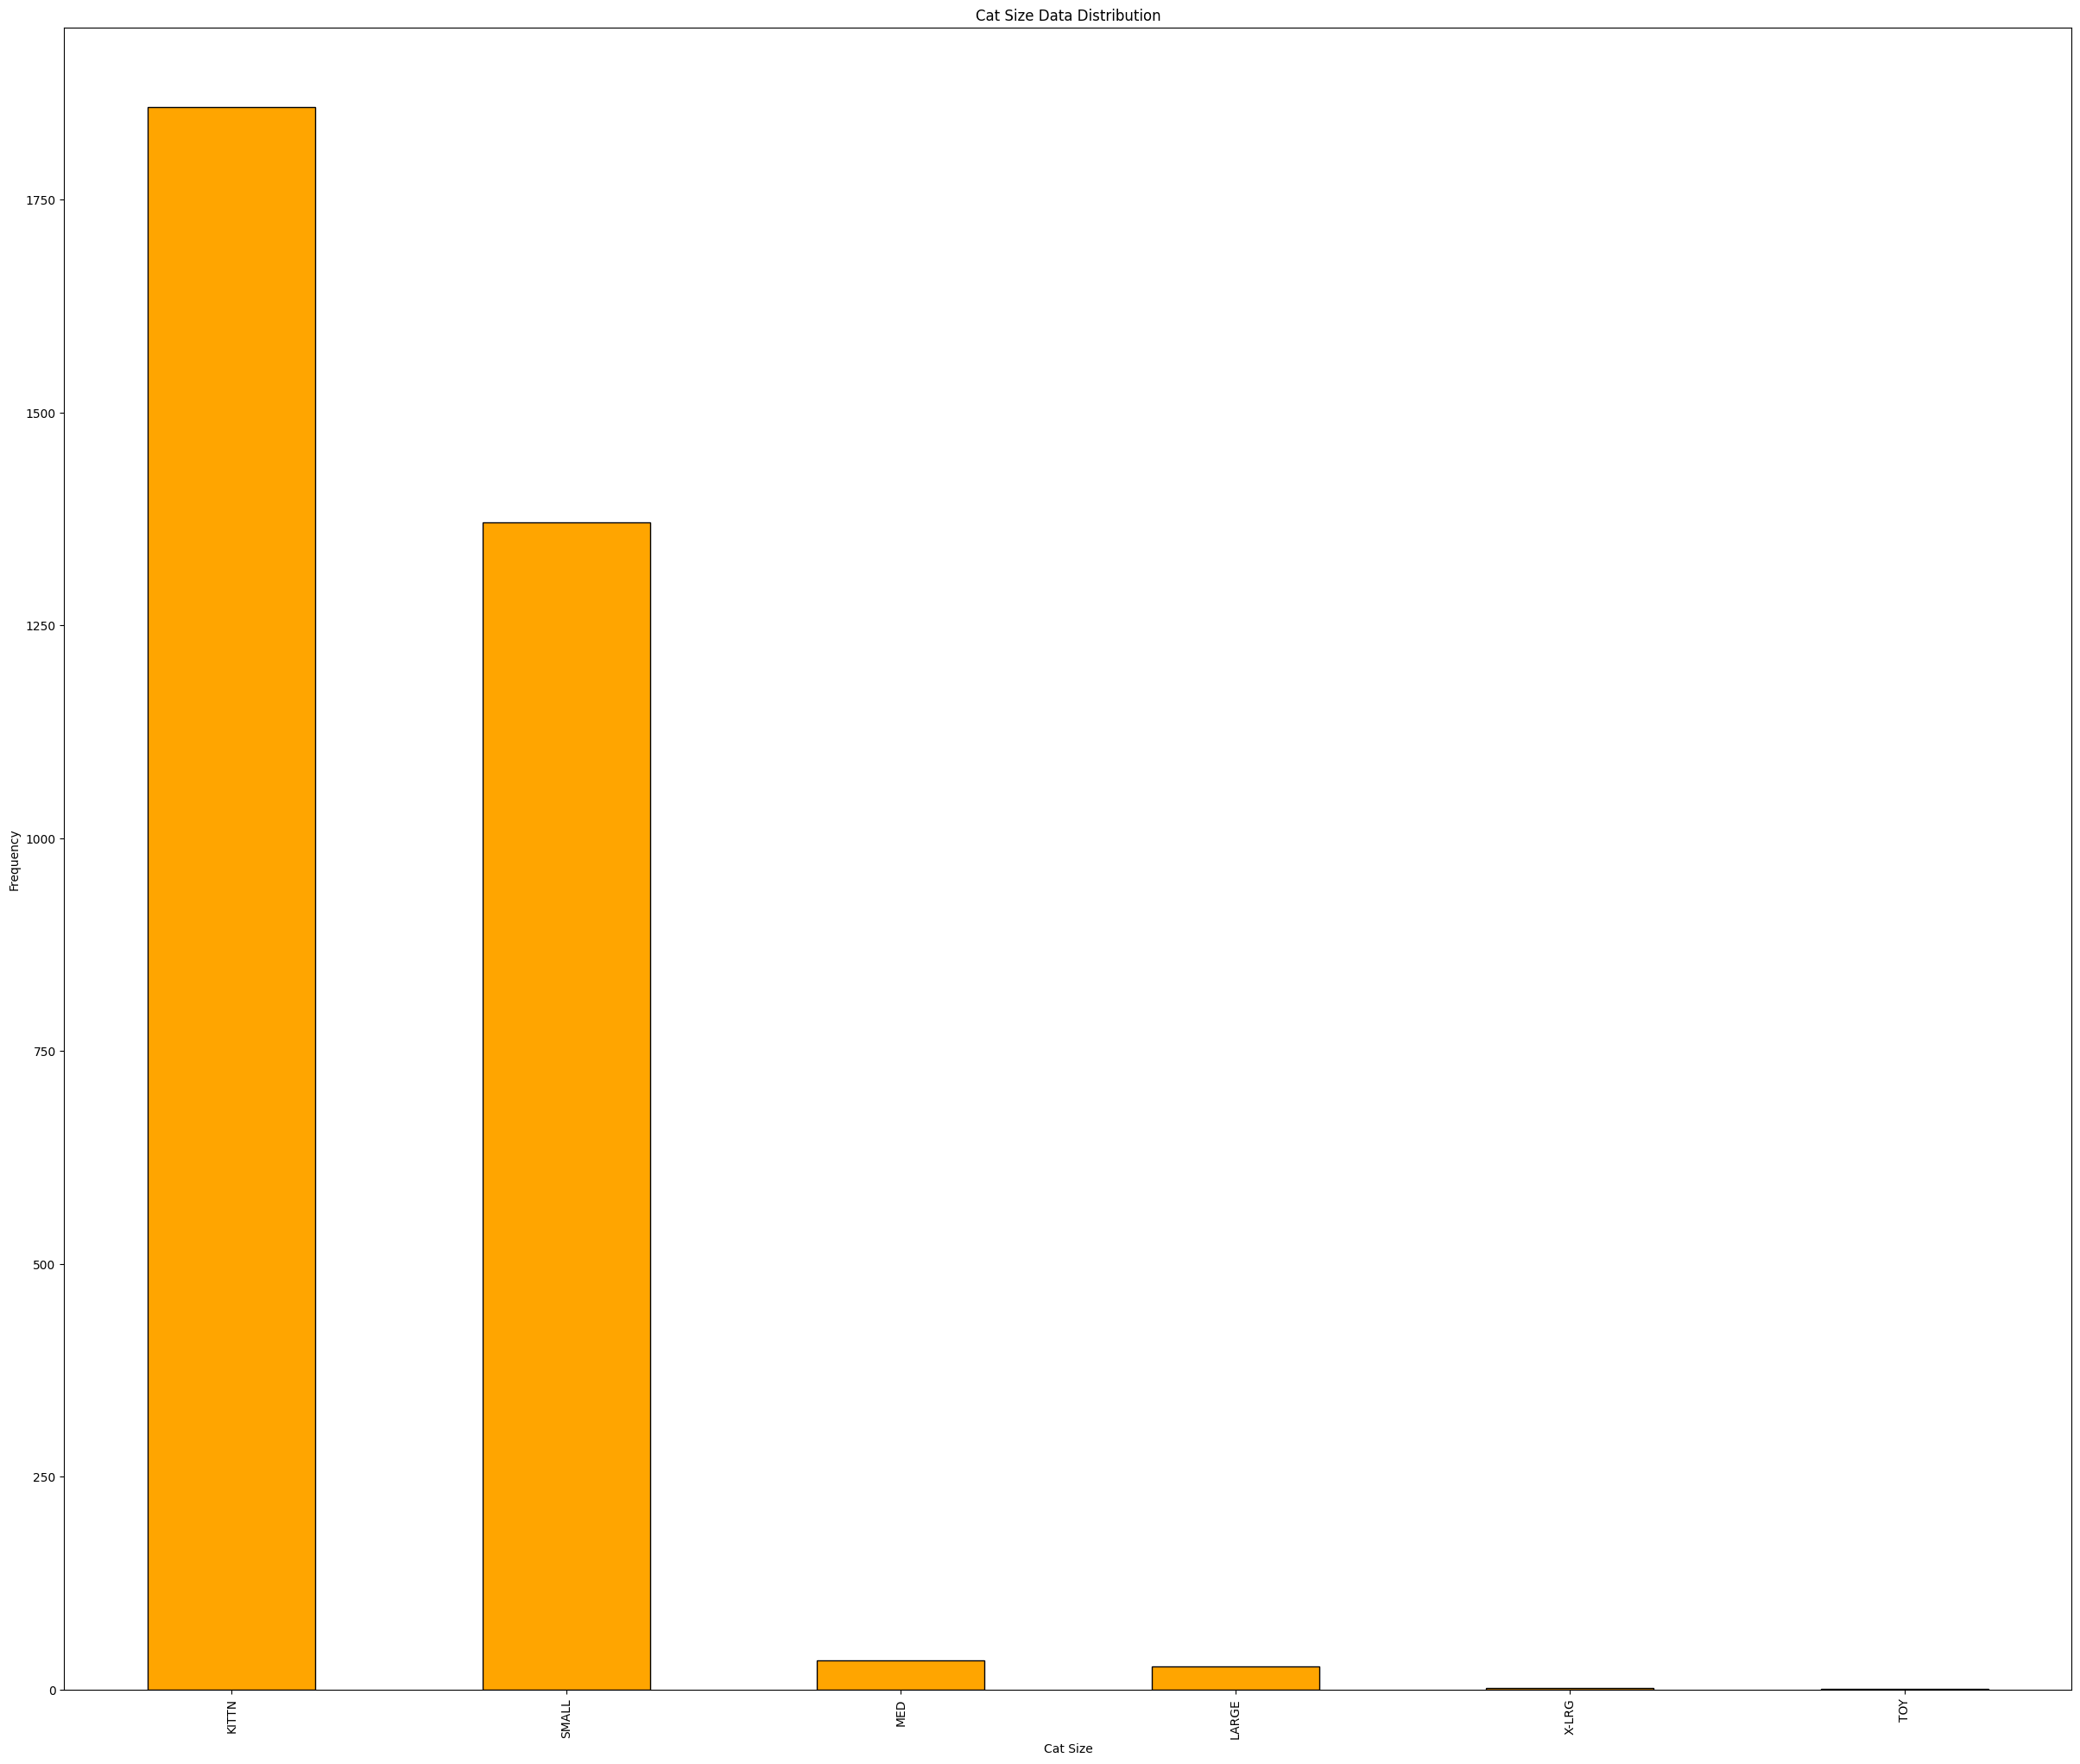

In [51]:
# ploting bar plot for Intake_Condition column
size_category_counts = selected_df['size'].value_counts()

size_category_counts.plot(kind='bar', color='orange', edgecolor='black', figsize= (30,25))

# Adding labels and title
plt.xlabel('Cat Size')
plt.ylabel('Frequency')
plt.title('Cat Size Data Distribution')

# Display the plot
plt.show()

In [52]:
size_category_counts

KITTN    1859
SMALL    1371
MED        34
LARGE      27
X-LRG       2
TOY         1
Name: size, dtype: int64

In [53]:
def assign_size(input_string):
    size_to_check = ['KITTN', 'SMALL']
    
    if any(size in input_string for size in size_to_check):
        return input_string
    else:
        return 'OTHER'

selected_df['simplified_size'] = selected_df['size'].apply(assign_size)
selected_df.head()

,color,sex,size,breed,intake_age,intake_condition,intake_type,days_in_shelter,simplified_color,simplified_sex,simplified_condition,simplified_type,simplified_breed,simplified_size
0,BRN TABBY/TORTIE,Spayed,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,81,TABBY,FEMALE,OTHER,STRAY,DOMESTIC BREED,KITTN
1,BRN TABBY/TORTIE,Spayed,KITTN,DOMESTIC SH,0,HEALTHY,OWNER SURRENDER,32,TABBY,FEMALE,HEALTHY,OWNER SURRENDER,DOMESTIC BREED,KITTN
2,BRN TABBY,Spayed,SMALL,DOMESTIC MH,0,HEALTHY,STRAY,94,TABBY,FEMALE,HEALTHY,STRAY,DOMESTIC BREED,SMALL
3,BRN TABBY,Neutered,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,80,TABBY,MALE,OTHER,STRAY,DOMESTIC BREED,KITTN
4,ORG TABBY/WHITE,Spayed,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,70,TABBY,FEMALE,OTHER,STRAY,DOMESTIC BREED,KITTN


## Data visualization after cleaning for 'intake condition'

In [54]:
size_category_counts2 = selected_df['simplified_size'].value_counts()
size_category_counts2

KITTN    1859
SMALL    1371
OTHER      64
Name: simplified_size, dtype: int64

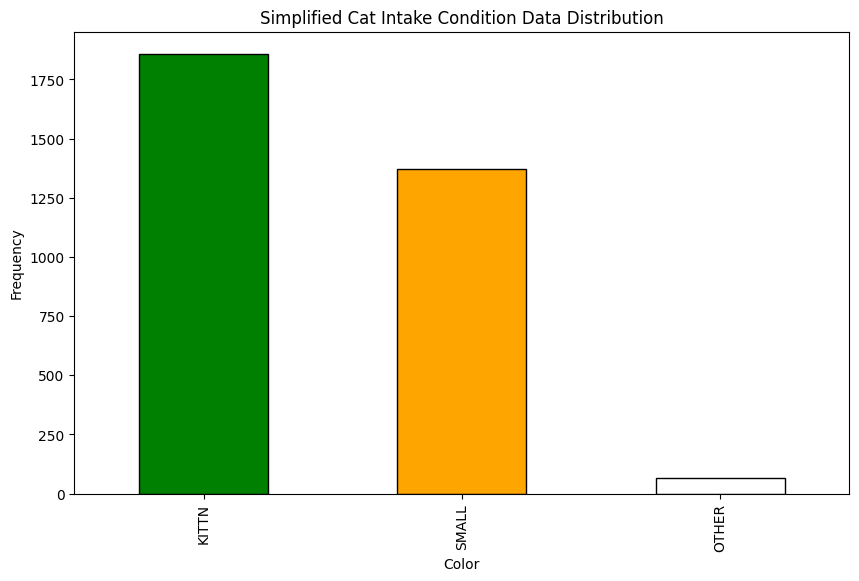

In [55]:
import matplotlib.pyplot as plt

# Create a color dictionary for each category
color_dict = {'KITTN': 'green','OTHER': 'white', 'SMALL': 'orange'}

# Plot the bar chart with specified colors
size_category_counts2.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=[color_dict.get(x, 'blue') for x in size_category_counts2.index])

# Adding labels and title
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.title('Simplified Cat Intake Condition Data Distribution')

# Display the plot
plt.show()


In [56]:
selected_df.head()

,color,sex,size,breed,intake_age,intake_condition,intake_type,days_in_shelter,simplified_color,simplified_sex,simplified_condition,simplified_type,simplified_breed,simplified_size
0,BRN TABBY/TORTIE,Spayed,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,81,TABBY,FEMALE,OTHER,STRAY,DOMESTIC BREED,KITTN
1,BRN TABBY/TORTIE,Spayed,KITTN,DOMESTIC SH,0,HEALTHY,OWNER SURRENDER,32,TABBY,FEMALE,HEALTHY,OWNER SURRENDER,DOMESTIC BREED,KITTN
2,BRN TABBY,Spayed,SMALL,DOMESTIC MH,0,HEALTHY,STRAY,94,TABBY,FEMALE,HEALTHY,STRAY,DOMESTIC BREED,SMALL
3,BRN TABBY,Neutered,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,80,TABBY,MALE,OTHER,STRAY,DOMESTIC BREED,KITTN
4,ORG TABBY/WHITE,Spayed,KITTN,DOMESTIC SH,0,UNKNOWN,STRAY,70,TABBY,FEMALE,OTHER,STRAY,DOMESTIC BREED,KITTN


In [57]:
selected_columns = ['simplified_color', 'simplified_sex', 'intake_age', 'simplified_condition','simplified_type','simplified_breed', 'simplified_size', 'days_in_shelter']

selected_df = selected_df[selected_columns]
selected_df.head()

,simplified_color,simplified_sex,intake_age,simplified_condition,simplified_type,simplified_breed,simplified_size,days_in_shelter
0,TABBY,FEMALE,0,OTHER,STRAY,DOMESTIC BREED,KITTN,81
1,TABBY,FEMALE,0,HEALTHY,OWNER SURRENDER,DOMESTIC BREED,KITTN,32
2,TABBY,FEMALE,0,HEALTHY,STRAY,DOMESTIC BREED,SMALL,94
3,TABBY,MALE,0,OTHER,STRAY,DOMESTIC BREED,KITTN,80
4,TABBY,FEMALE,0,OTHER,STRAY,DOMESTIC BREED,KITTN,70


# Exporting cleaned dataset

In [59]:
selected_df.to_csv("../dataset/sonoma_county_cleaned_data_nov_28.csv", index = False)